<h4><font color='#C44B4B'> <u>PROBLEM STATEMENT:</u></font><center><br><br>
<font color='#15657F'>PREDICT THE OUTPUT OF THE FOOD PROCESSING FARMS FOR THE NEXT YEAR (2017).
</font></center></h4>
<br>
<img src="Agriculture3.jpg" width = '800'>
<br>



A new fast food chain is seeing rapid expansion over the past couple of years. They
are now trying to optimize their supply chain to ensure that there are no shortages
of ingredients. For this, they’ve tasked their data science team to come up with a
model that could predict the output of each food processing farm over the next
few years. These predictions could further increase the efficiency of their current
supply chain management systems.
   

<h4><font color='#C44B4B'><u>PHD MACHINE LEARNING PROBLEM:</u></font><center><br><br><font color='#15657F'>USE A MACHINE LEARNING MODEL TO PREDICT THE YIELD FOR EACH FARM</font></center></h4>



1. Explore the data and engineer new features
2. Predict the yield for each farm during the given timestamps
3. Given the forecasted demand for the next few months for a particular ingredient, device a strategy to source it

<h4><center><font color='#15657F'>ATTRIBUTE DESCRIPTION</font></center></h4> 
<h4><font color='#C44B4B'><u>Train data and Test data:</u></font></h4>
<table cellspacing="0" border="0">
	<tr>
		<td height="17" align="left">Farm id</td>
		<td align="left">Unique farm ids</td>
	</tr>
	<tr>
		<td height="17" align="left">Date</td>
		<td align="left">Dates per hour from 2016 in train and from 2017 in test </td>
	</tr>
	<tr>
		<td height="17" align="left">Ingredient_type</td>
		<td align="left">Type of ingredient in the farm : There are 4 types - w,x,y,z</td>
	</tr>
	<tr>
		<td height="17" align="left">Yield</td>
		<td align="left">Yield for each farm per hour</td>
	</tr>
</table>

<h4><font color='#C44B4B'><u>Farm Data</u></font></h4>
<table cellspacing="0" border="0">
	<tr>
		<td height="17" align="left">Farm id</td>
		<td align="left">Unique farm ids</td>
	</tr>
	<tr>
		<td height="17" align="left">operations_commencing_year</td>
		<td align="left">Year the farm has started</td>
	</tr>
	<tr>
		<td height="17" align="left">num_processing_plants</td>
		<td align="left">processing plants present in the location/ farm </td>
	</tr>
	<tr>
		<td height="17" align="left">farm_area</td>
		<td align="left">Area of the given farm</td>
	</tr>
	<tr>
		<td height="17" align="left">farming_company</td>
		<td align="left">The company that owns the farm</td>
	</tr>
	<tr>
		<td height="17" align="left">deidentified_location</td>
		<td align="left">Location of the farm</td>
	</tr>

	
</table>

<h4><font color='#C44B4B'><u>Train weather and Test weather</u></font></h4>
<table cellspacing="0" border="0">
	<tr>
		<td height="17" align="left">timestamp</td>
		<td align="left">Dates at which the weather was calculated at each hour</td>
	</tr>
	<tr>
		<td height="17" align="left">deidentified_location</td>
		<td align="left">Location of the farm</td>
	</tr>
	<tr>
		<td height="17" align="left">temp_obs</td>
		<td align="left">Temperature at that hour</td>
	</tr>
	<tr>
		<td height="17" align="left">cloudiness</td>
		<td align="left">Cloulds present in the sky at that hour</td>
	</tr>
	<tr>
		<td height="17" align="left">wind_direction</td>
		<td align="left">The direction of the wind at the hour</td>
	</tr>
	<tr>
		<td height="17" align="left">dew_temp</td>
		<td align="left">Dew temperature at the hour</td>
	</tr>
	<tr>
		<td height="17" align="left">pressure_sea_level</td>
		<td align="left">Pressure sea level at the hour</td>
	</tr>
	<tr>
		<td height="17" align="left">precipitation</td>
		<td align="left">Rainfall at the hour</td>
	</tr>
	<tr>
		<td height="17" align="left">wind_speed</td>
		<td align="left">Wind speed at that hour</td>
	</tr>


</table>

<h4><font color='#C44B4B'><u> EVALUATION METRIC:</u></font></h4> <br>Root Mean Squared Error (RMSE)

## Connecting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Importing the dataset

In [0]:
import pandas as pd
import numpy as np

In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [0]:

print('-' * 80)
print('train_data')
train_data = import_data('/content/drive/My Drive/phd/train_data.csv')

print('-' * 80)
print('farm_data')
farm_data = import_data("/content/drive/My Drive/phd/farm_data.csv")

print('-' * 80)
print('train_weather')
train_weather = import_data('/content/drive/My Drive/phd/train_weather.csv')

print('-' * 80)
print('test_data')
test_data = import_data('/content/drive/My Drive/phd/test_data.csv')

print('-' * 80)
print('test_weather')
test_weather = import_data('/content/drive/My Drive/phd/test_weather.csv')

--------------------------------------------------------------------------------
train_data
Memory usage of dataframe is 616.95 MB
Memory usage after optimization is: 173.95 MB
Decreased by 71.8%
--------------------------------------------------------------------------------
farm_data
Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.07 MB
Decreased by -2.6%
--------------------------------------------------------------------------------
train_weather
Memory usage of dataframe is 9.60 MB
Memory usage after optimization is: 2.65 MB
Decreased by 72.4%
--------------------------------------------------------------------------------
test_data
Memory usage of dataframe is 636.26 MB
Memory usage after optimization is: 179.38 MB
Decreased by 71.8%
--------------------------------------------------------------------------------
test_weather
Memory usage of dataframe is 9.53 MB
Memory usage after optimization is: 2.63 MB
Decreased by 72.4%


In [0]:

submission_file = pd.read_csv("/content/drive/My Drive/phd/sample_submission.csv")

In [0]:
submission_file.shape

(20848800, 2)

In [0]:
submission_file.head()

,id,yield
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [0]:
print(train_data.shape)
print(farm_data.shape)
print(train_weather.shape)
print(test_data.shape)
print(test_weather.shape)

(20216100, 4)
(1449, 6)
(139773, 9)
(20848800, 4)
(138825, 9)


In [0]:
train_data.describe(include= 'all')

,date,farm_id,ingredient_type,yield
count,20216100,20216100,20216100,2.021610e+07
unique,8784,1434,4,NaN
top,2016-12-27 22:00:00,fid_63700,ing_w,NaN
freq,2370,51227,12060910,NaN
mean,NaN,NaN,NaN,1.988706e+03
std,NaN,NaN,NaN,1.532159e+05
min,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,1.830000e+01
50%,NaN,NaN,NaN,7.877500e+01
75%,NaN,NaN,NaN,2.679840e+02


In [0]:
farm_data.describe(include= 'all')

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
count,1449,675.0000,355.000000,1449.000000,1449,1449
unique,1434,NaN,NaN,NaN,16,16
top,fid_63700,NaN,NaN,NaN,Obery Farms,location 5290
freq,2,NaN,NaN,NaN,549,274
mean,NaN,inf,7.742188,8557.459961,NaN,NaN
std,NaN,31.0625,3.333984,10290.857422,NaN,NaN
min,NaN,1900.0000,5.000000,26.291550,NaN,NaN
25%,NaN,1949.0000,5.000000,2137.883789,NaN,NaN
50%,NaN,1970.0000,7.000000,5357.994629,NaN,NaN
75%,NaN,1995.0000,9.000000,10746.647461,NaN,NaN


In [0]:
train_weather.describe(include= 'all')

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,139773,139773,139718.000000,70600.0,133505.0,139660.000000,129155.0,89484.0,139469.000000
unique,8784,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-12-31 23:00:00,location 7369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.000000,0.0,NaN,0.000000,NaN,NaN,0.000000
min,NaN,NaN,-28.906250,0.0,0.0,-35.000000,968.0,-1.0,0.000000
25%,NaN,NaN,7.199219,0.0,80.0,0.600098,1012.0,0.0,2.099609
50%,NaN,NaN,15.000000,2.0,190.0,8.296875,1016.5,0.0,3.099609
75%,NaN,NaN,22.203125,4.0,280.0,14.398438,1021.0,0.0,5.000000


In [0]:
def inspect_data(data) :
      return pd.DataFrame({"Data type": data.dtypes,"NUll Values": data.isnull().sum(),
                           "No of Levels": data.apply(lambda x: str(x.nunique()),axis=0),
                          "Levels": data.apply(lambda x: str(x.unique()),axis=0)})

In [0]:
inspect_data(train_data)

,Data type,NUll Values,No of Levels,Levels
date,category,0,8784,"[2016-01-01 00:00:00, 2016-01-01 01:00:00, 201..."
farm_id,category,0,1434,"[fid_110884, fid_90053, fid_17537, fid_110392,..."
ingredient_type,category,0,4,"[ing_w, ing_z, ing_x, ing_y]\nCategories (4, o..."
yield,float32,0,1688175,[ 0. 53.23970032 43.00130081 ......


In [0]:
inspect_data(farm_data)

,Data type,NUll Values,No of Levels,Levels
farm_id,category,0,1434,"[fid_110884, fid_90053, fid_17537, fid_110392,..."
operations_commencing_year,float16,774,116,[2008. 2004. 1991. 2002. 1975. 2000. 1981. 198...
num_processing_plants,float16,1094,18,[nan 9. 8. 14. 10. 12. 11. 13. 17. 20. 15. 1...
farm_area,float32,0,1397,[ 690.45507812 252.69616699 499.4465332 ......
farming_company,category,0,16,"[Obery Farms, Dole Food Company, Wayne Farms, ..."
deidentified_location,category,0,16,"[location 7369, location 959, location 5489, l..."


In [0]:
inspect_data(train_weather)

,Data type,NUll Values,No of Levels,Levels
timestamp,category,0,8784,"[2016-01-01 00:00:00, 2016-01-01 01:00:00, 201..."
deidentified_location,category,0,16,"[location 7369, location 959, location 5489, l..."
temp_obs,float16,55,619,[ 25. 24.40625 22.796875 21.09...
cloudiness,float16,69173,10,[ 6. nan 2. 4. 8. 0. 9. 7. 5. 3. 1.]
wind_direction,float16,6268,43,[ 0. 70. 250. 210. 290. 230. 200. 180. 220. ...
dew_temp,float16,113,522,[ 20. 21.09375 20.59375 19.40...
pressure_sea_level,float16,10618,133,[1019.5 1020. nan 1019. 1018. 1018.5 102...
precipitation,float16,50289,128,[ nan -1. 0. 3. 5. 8. 2. 10. 20. ...
wind_speed,float16,304,58,[ 0. 1.5 2.59960938 3.099609...


In [0]:
inspect_data(test_data)

,Data type,NUll Values,No of Levels,Levels
date,category,0,8760,"[2017-01-01 00:00:00, 2017-01-01 01:00:00, 201..."
farm_id,category,0,1434,"[fid_110884, fid_90053, fid_17537, fid_110392,..."
ingredient_type,category,0,4,"[ing_w, ing_x, ing_z, ing_y]\nCategories (4, o..."
id,int32,0,20848800,[ 0 1 2 ... 41696847 41696...


In [0]:
inspect_data(test_weather)

,Data type,NUll Values,No of Levels,Levels
timestamp,category,0,8760,"[2017-01-01 00:00:00, 2017-01-01 01:00:00, 201..."
deidentified_location,category,0,16,"[location 7369, location 959, location 5489, l..."
temp_obs,float16,43,612,[ 17.796875 16.09375 17.203125 16.70...
cloudiness,float16,69065,10,[ 4. 2. 0. nan 6. 8. 9. 7. 1. 3. 5.]
wind_direction,float16,6134,53,[100. 130. 140. 150. 0. 80. 110. 160. 170. ...
dew_temp,float16,184,528,[ 11.703125 12.796875 13.296875 12.20...
pressure_sea_level,float16,10883,130,[1021.5 1022. 1022.5 1021. 1023. 1020.5 102...
precipitation,float16,47788,144,[ nan 0. -1. 51. 8. 79. 41. 76. 3. ...
wind_speed,float16,240,70,[ 3.59960938 3.09960938 2.59960938 2.099609...


## Converting the date, timestamp to datetime format

In [0]:
train_data['date'] = train_data['date'].astype("object")
train_weather['timestamp'] = train_weather['timestamp'].astype("object")
test_data['date'] = test_data['date'].astype("object")
test_weather['timestamp'] = test_weather['timestamp'].astype("object")

In [0]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_weather['timestamp'] = pd.to_datetime(train_weather['timestamp'])
test_data['date'] = pd.to_datetime(test_data['date'])
test_weather['timestamp'] = pd.to_datetime(test_weather['timestamp'])

In [0]:
train_weather.dtypes

timestamp                datetime64[ns]
deidentified_location          category
temp_obs                        float16
cloudiness                      float16
wind_direction                  float16
dew_temp                        float16
pressure_sea_level              float16
precipitation                   float16
wind_speed                      float16
dtype: object

In [0]:
train_data.groupby('farm_id')['date'].nunique().reset_index(name='counts').sort_values(by = ['counts'])

,farm_id,counts
405,fid_19864,479
406,fid_20058,1012
1116,fid_73322,1685
247,fid_118770,2327
963,fid_60652,2657
...,...,...
557,fid_30973,8784
558,fid_31213,8784
1048,fid_68361,8784
1064,fid_69323,8784


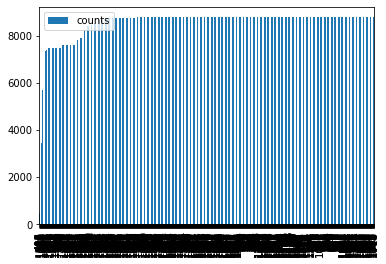

In [0]:
train_data.groupby('farm_id')['date'].nunique().reset_index(name='counts').sort_values(by = ['counts']).plot(kind = 'bar')

In [0]:
test_data.groupby('farm_id')['date'].nunique().reset_index(name='counts')

,farm_id,counts
0,fid_100053,8760
1,fid_100107,8760
2,fid_100135,8760
3,fid_100249,8760
4,fid_100303,8760
...,...,...
1429,fid_99437,8760
1430,fid_99482,8760
1431,fid_99826,8760
1432,fid_99921,8760


In [0]:
train_weather.groupby('deidentified_location')['timestamp'].nunique().reset_index(name='counts')


,deidentified_location,counts
0,location 1784,8782
1,location 2532,8783
2,location 4525,8614
3,location 5150,8454
4,location 5290,8780
5,location 5410,8777
6,location 5489,8783
7,location 565,8782
8,location 5677,8784
9,location 5833,8783


In [0]:
test_weather.groupby('deidentified_location')['timestamp'].nunique().reset_index(name='counts')

,deidentified_location,counts
0,location 1784,8743
1,location 2532,8759
2,location 4525,8246
3,location 5150,8520
4,location 5290,8759
5,location 5410,8759
6,location 5489,8760
7,location 565,8757
8,location 5677,8760
9,location 5833,8759


In [0]:
train_data.groupby('farm_id')['ingredient_type'].nunique().reset_index(name='counts')

,farm_id,counts
0,fid_100053,1
1,fid_100107,3
2,fid_100135,1
3,fid_100249,1
4,fid_100303,1
...,...,...
1429,fid_99437,1
1430,fid_99482,1
1431,fid_99826,1
1432,fid_99921,2


In [0]:
test_data.groupby('farm_id')['ingredient_type'].nunique().reset_index(name='counts')

,farm_id,counts
0,fid_100053,1
1,fid_100107,3
2,fid_100135,1
3,fid_100249,1
4,fid_100303,1
...,...,...
1429,fid_99437,1
1430,fid_99482,1
1431,fid_99826,1
1432,fid_99921,2


In [0]:
len(train_data.loc[train_data['yield']==0,:])

1873976

In [0]:
test_data.sort_values(by = ['date']).tail()

,date,farm_id,ingredient_type,id
8188446,2017-12-31 23:00:00,fid_70340,ing_w,15584347
8188445,2017-12-31 23:00:00,fid_122564,ing_w,15584346
8188444,2017-12-31 23:00:00,fid_64922,ing_w,15584345
8188442,2017-12-31 23:00:00,fid_98025,ing_w,15584343
4213117,2017-12-31 23:00:00,fid_27893,ing_x,5880799


In [0]:
test_data.head()

,date,farm_id,ingredient_type,id
0,2017-01-01,fid_110884,ing_w,0
1,2017-01-01,fid_90053,ing_w,1
2,2017-01-01,fid_17537,ing_w,2
3,2017-01-01,fid_110392,ing_w,3
4,2017-01-01,fid_62402,ing_w,4


In [0]:
test_data.tail()

,date,farm_id,ingredient_type,id
20848795,2017-12-25 07:00:00,fid_58769,ing_x,41696845
20848796,2017-12-25 07:00:00,fid_58769,ing_z,41696846
20848797,2017-12-25 07:00:00,fid_117010,ing_w,41696847
20848798,2017-12-25 07:00:00,fid_117010,ing_x,41696848
20848799,2017-12-25 07:00:00,fid_117010,ing_z,41696849


In [0]:
submission_file.tail()

,id,yield
20848795,41696845,0
20848796,41696846,0
20848797,41696847,0
20848798,41696848,0
20848799,41696849,0


## Checking duplicate present in the data

### Checking duplicate present in the train_weather

In [0]:
train_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.000000,6.0,0.0,20.00000,1019.5,NaN,0.000000
1,2016-01-01 01:00:00,location 7369,24.406250,NaN,70.0,21.09375,1020.0,-1.0,1.500000
2,2016-01-01 02:00:00,location 7369,22.796875,2.0,0.0,21.09375,1020.0,0.0,0.000000
3,2016-01-01 03:00:00,location 7369,21.093750,2.0,0.0,20.59375,1020.0,0.0,0.000000
4,2016-01-01 04:00:00,location 7369,20.000000,2.0,250.0,20.00000,1020.0,-1.0,2.599609


In [0]:
duplicateRowsDF = train_weather[train_weather.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [0]:
duplicateRowsDF = train_weather[train_weather[['timestamp','deidentified_location']].duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


### Checking duplicate present in the test_weather

In [0]:
duplicateRowsDF = test_weather[test_weather.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [0]:
duplicateRowsDF = test_weather[test_weather[['timestamp','deidentified_location']].duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


### Checking duplicate present in the farm_data

In [0]:
duplicateRowsDF = farm_data[farm_data.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [0]:
duplicateRowsDF = farm_data[farm_data['farm_id'].duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
15


### Checking duplicate present in the train_data

In [0]:
duplicateRowsDF = train_data[train_data.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
117


In [0]:
train_data2 = train_data.drop("yield", axis=1)

In [0]:
duplicateRowsDF = train_data2[train_data2.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
135568


#### *So for 135568 records the their is different yield values and everything else the same.*

### Checking duplicate present in the test_data

In [0]:
duplicateRowsDF = test_data[test_data.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [0]:
test_data2 = test_data.drop("id", axis=1)

In [0]:
duplicateRowsDF = test_data2[test_data2.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
148920


#### *There are also 148920 duplicates present in the test data records.*

#### Dropping the records where the whole rows are duplicated

In [0]:
train_data.duplicated().sum()

117

In [0]:
train_data.drop_duplicates().shape

(20215983, 4)

In [0]:
train_data.drop_duplicates(inplace=True)

In [0]:
train_data.shape

(20215983, 4)

### Dropping the records are duplicate except for yield, i.e mutiple similar records having different yields in train_data

In [0]:
train_data.columns

Index(['date', 'farm_id', 'ingredient_type', 'yield'], dtype='object')

In [0]:
train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type']).sum()

135451

In [0]:
train_data.loc[train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type'],keep=False),:].sort_values(by = ['date','farm_id','ingredient_type']).head()

,date,farm_id,ingredient_type,yield
1483,2016-01-01,fid_122174,ing_w,69.516998
1598,2016-01-01,fid_122174,ing_w,39.519001
695,2016-01-01,fid_18990,ing_w,129.789993
747,2016-01-01,fid_18990,ing_w,354.412994
669,2016-01-01,fid_26064,ing_w,7.770000


In [0]:
train_data.loc[train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type'],keep=False),:].sort_values(by = ['date','farm_id','ingredient_type']).tail()

,date,farm_id,ingredient_type,yield
20215484,2016-12-31 23:00:00,fid_73431,ing_w,107.867996
20214247,2016-12-31 23:00:00,fid_81333,ing_w,42.320000
20214568,2016-12-31 23:00:00,fid_81333,ing_w,391.625000
20214316,2016-12-31 23:00:00,fid_97094,ing_w,15.140000
20215920,2016-12-31 23:00:00,fid_97094,ing_w,2.400000


In [0]:
train_data.loc[train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type'],keep=False),:].sort_values(by = ['date']).tail()

,date,farm_id,ingredient_type,yield
20213971,2016-12-31 23:00:00,fid_68761,ing_w,16.240000
20213812,2016-12-31 23:00:00,fid_40459,ing_w,301.828003
20215903,2016-12-31 23:00:00,fid_59158,ing_w,6.900000
20214568,2016-12-31 23:00:00,fid_81333,ing_w,391.625000
20215920,2016-12-31 23:00:00,fid_97094,ing_w,2.400000


#### Storing the dopped duplicates in another df before dropping them

In [0]:
dropped_dup_train = train_data.loc[train_data.duplicated(subset=['date', 'farm_id', 'ingredient_type'],keep=False),:].sort_values(by = ['date','farm_id','ingredient_type'])

In [0]:
dropped_dup_train.shape

(270902, 4)

In [0]:
dropped_dup_train.head()

,date,farm_id,ingredient_type,yield
1483,2016-01-01,fid_122174,ing_w,69.516998
1598,2016-01-01,fid_122174,ing_w,39.519001
695,2016-01-01,fid_18990,ing_w,129.789993
747,2016-01-01,fid_18990,ing_w,354.412994
669,2016-01-01,fid_26064,ing_w,7.770000


#### dropping all duplicates in train_data first

In [0]:
train_data2 = train_data.copy()

In [0]:
train_data2.drop_duplicates(subset=['date', 'farm_id', 'ingredient_type'],keep=False).shape

(19945081, 4)

In [0]:
train_data2.drop_duplicates(subset=['date', 'farm_id', 'ingredient_type'],keep=False,inplace=True)

In [0]:
train_data2.shape

(19945081, 4)

#### Taking the avg of the yield value in the duplicated rows

In [0]:
# Often, it's better to mark bad rows in a dataframe instead of deleting them.

# This helps keep track of what modifications were done from the raw data until the processed dataframe.

#### Taking the mean of the yield of the duplicated records in the dropped duplicated records of train_data first

In [0]:
dropped_dup_traintempdf = pd.DataFrame(((dropped_dup_train['yield'] + dropped_dup_train['yield'].shift(-1)) / 2)[::2])

In [0]:
type(dropped_dup_traintempdf)

pandas.core.frame.DataFrame

In [0]:
dropped_dup_traintempdf[:5]

,yield
1483,54.517998
695,242.101501
669,545.335022
783,65.803757
64,1.550000


In [0]:
#####################

In [0]:
dropped_dup_traintempdf_merge = pd.merge(dropped_dup_train, dropped_dup_traintempdf, left_index=True, right_index=True)

In [0]:
dropped_dup_traintempdf_merge.head()

,date,farm_id,ingredient_type,yield_x,yield_y
1483,2016-01-01,fid_122174,ing_w,69.516998,54.517998
695,2016-01-01,fid_18990,ing_w,129.789993,242.101501
669,2016-01-01,fid_26064,ing_w,7.770000,545.335022
783,2016-01-01,fid_29387,ing_w,0.162500,65.803757
64,2016-01-01,fid_40459,ing_w,0.000000,1.550000


In [0]:
dropped_dup_traintempdf_merge.isnull().sum()

date               0
farm_id            0
ingredient_type    0
yield_x            0
yield_y            0
dtype: int64

In [0]:
dropped_dup_traintempdf_merge.duplicated().sum()

0

In [0]:
dropped_dup_traintempdf_merge.drop("yield_x",axis = 1, inplace=True)

In [0]:
dropped_dup_traintempdf_merge.shape

(135451, 4)

In [0]:
dropped_dup_traintempdf_merge.rename({'yield_y': 'yield'}, axis=1, inplace = True)

In [0]:
dropped_dup_traintempdf_merge.tail(5)

,date,farm_id,ingredient_type,yield
20214297,2016-12-31 23:00:00,fid_68792,ing_w,303.235840
20214598,2016-12-31 23:00:00,fid_71910,ing_w,22.299999
20214206,2016-12-31 23:00:00,fid_73431,ing_w,65.319000
20214247,2016-12-31 23:00:00,fid_81333,ing_w,216.972504
20214316,2016-12-31 23:00:00,fid_97094,ing_w,8.770000


#### Now merging it back to the train_Data

In [0]:
train_data2_combined_02= pd.concat([train_data2, dropped_dup_traintempdf_merge])

In [0]:
train_data2_combined_02.shape

(20080532, 4)

In [0]:
train_data2_combined_02.tail()

,date,farm_id,ingredient_type,yield
20214297,2016-12-31 23:00:00,fid_68792,ing_w,303.235840
20214598,2016-12-31 23:00:00,fid_71910,ing_w,22.299999
20214206,2016-12-31 23:00:00,fid_73431,ing_w,65.319000
20214247,2016-12-31 23:00:00,fid_81333,ing_w,216.972504
20214316,2016-12-31 23:00:00,fid_97094,ing_w,8.770000


## Removing duplicates farmid from farm_data

In [0]:
farm_data2  = farm_data.groupby('farm_id', group_keys=False).apply(lambda x: x.loc[x.farm_area.idxmax()])

In [0]:
farm_data2.reset_index(drop=True,inplace = True)

In [0]:
farm_data2.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_100053,NaN,NaN,2043.865967,Del Monte Foods,location 5290
1,fid_100107,NaN,NaN,35416.574219,Del Monte Foods,location 2532
2,fid_100135,NaN,NaN,1432.564209,Dole Food Company,location 5290
3,fid_100249,NaN,NaN,941.571899,Wayne Farms,location 5489
4,fid_100303,NaN,NaN,3716.120117,Wayne Farms,location 5290


In [0]:
farm_data2.shape

(1434, 6)

## Checking for % of Null values in each column

In [0]:
# Checking for % of Null values in each column
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

In [0]:
missing(train_data2_combined_02)

yield              0.0
ingredient_type    0.0
farm_id            0.0
date               0.0
dtype: float64


In [0]:
missing(farm_data2)

num_processing_plants         75.59
operations_commencing_year    53.63
deidentified_location          0.00
farming_company                0.00
farm_area                      0.00
farm_id                        0.00
dtype: float64


In [0]:
missing(train_weather)

cloudiness               49.49
precipitation            35.98
pressure_sea_level        7.60
wind_direction            4.48
wind_speed                0.22
dew_temp                  0.08
temp_obs                  0.04
deidentified_location     0.00
timestamp                 0.00
dtype: float64


In [0]:
missing(test_data)

id                 0.0
ingredient_type    0.0
farm_id            0.0
date               0.0
dtype: float64


In [0]:
missing(test_weather)

cloudiness               49.75
precipitation            34.42
pressure_sea_level        7.84
wind_direction            4.42
wind_speed                0.17
dew_temp                  0.13
temp_obs                  0.03
deidentified_location     0.00
timestamp                 0.00
dtype: float64


### Dropping the columns having >40% missing values

In [0]:
farm_data2.shape[0]*0.60

860.4

In [0]:
min_threshold_na_farm = farm_data2.shape[0]*0.60
farm_data2.dropna( thresh=min_threshold_na_farm, axis=1,inplace=True)


In [0]:
min_threshold_na_weather_train = train_weather.shape[0]*0.60
train_weather.dropna( thresh=min_threshold_na_weather_train, axis=1,inplace=True)

In [0]:
min_threshold_na_weather_test = test_weather.shape[0]*0.60
test_weather.dropna( thresh=min_threshold_na_weather_test, axis=1,inplace=True)

In [0]:
test_weather.columns

Index(['timestamp', 'deidentified_location', 'temp_obs', 'wind_direction',
       'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed'],
      dtype='object')

## Imputation of train and test weather using mean

In [0]:
test_weather['precipitation'].value_counts()

 0.0      78640
-1.0       5964
 3.0       1612
 5.0        852
 2.0        530
          ...  
 442.0        1
 99.0         1
 201.0        1
 140.0        1
 150.0        1
Name: precipitation, Length: 144, dtype: int64

In [0]:
train_weather['precipitation'].value_counts()

 0.0      77910
-1.0       5780
 3.0       1469
 5.0        720
 2.0        517
          ...  
 175.0        1
 73.0         1
 333.0        1
 109.0        1
 180.0        1
Name: precipitation, Length: 128, dtype: int64

In [0]:
col_to_imputed_weather = ['temp_obs', 'wind_direction','dew_temp', 'pressure_sea_level', 'wind_speed',"precipitation"]

In [0]:
train_weather['timestamp'] = pd.to_datetime(train_weather['timestamp'])
test_weather['timestamp'] = pd.to_datetime(test_weather['timestamp'])

In [0]:
train_weather['dayofyear'] = train_weather['timestamp'].dt.dayofyear
test_weather['dayofyear'] = test_weather['timestamp'].dt.dayofyear

In [0]:
train_weather[col_to_imputed_weather] = train_weather[col_to_imputed_weather].fillna(train_weather.groupby(['deidentified_location','dayofyear'])[col_to_imputed_weather].transform('mean'))

In [0]:
test_weather[col_to_imputed_weather] = test_weather[col_to_imputed_weather].fillna(test_weather.groupby(['deidentified_location','dayofyear'])[col_to_imputed_weather].transform('mean'))

In [0]:
train_weather.isnull().sum()

timestamp                    0
deidentified_location        0
temp_obs                     0
wind_direction               0
dew_temp                     0
pressure_sea_level        8892
precipitation            40567
wind_speed                   0
dayofyear                    0
dtype: int64

In [0]:
test_weather.isnull().sum()

timestamp                    0
deidentified_location        0
temp_obs                     0
wind_direction               0
dew_temp                     1
pressure_sea_level        8501
precipitation            36285
wind_speed                   0
dayofyear                    0
dtype: int64

In [0]:
train_weather.pressure_sea_level.value_counts().sort_values()

972.0        1
969.0        1
973.0        1
968.5        1
968.0        1
          ... 
1018.5    3854
1016.5    3925
1015.0    3925
1018.0    3948
1016.0    3991
Name: pressure_sea_level, Length: 133, dtype: int64

In [0]:
test_weather.pressure_sea_level.value_counts().sort_values()

976.5        1
972.0        1
1050.0       2
973.5        2
975.5        2
          ... 
1017.0    3890
1016.5    3974
1015.5    4003
1015.0    4019
1016.0    4037
Name: pressure_sea_level, Length: 130, dtype: int64

### *Since 0 is occuring majority of the times in precipitation; imputing the remaining NULL values of precipitation with mode i.e 0 and pressure_sea_level with the mean as their values range are close, so it makes more sense*

In [0]:
train_weather['precipitation'].fillna(train_weather['precipitation'].mode(), inplace=True)

In [0]:
test_weather['precipitation'].fillna(test_weather['precipitation'].mode(), inplace=True)

In [0]:
train_weather.fillna(train_weather.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [0]:
test_weather.fillna(test_weather.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [0]:
train_weather.drop("dayofyear",axis =1,inplace =True)
test_weather.drop("dayofyear",axis =1,inplace =True)

## Merging train_Data with farm_data
## Merging test_Data with farm_data

In [0]:
initial_merged_train = pd.merge(train_data2_combined_02, farm_data2,on = "farm_id")

In [0]:
initial_merged_train2 = initial_merged_train.drop('yield',axis = 1)

In [0]:
duplicateRowsDF = initial_merged_train2[initial_merged_train2.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [0]:
initial_merged_test = pd.merge(test_data, farm_data2,on = "farm_id")

In [0]:
duplicateRowsDF = initial_merged_test[initial_merged_test.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [0]:
# import pickle
# initial_merged_train.to_pickle("/content/drive/My Drive/phd/initial_merged_train.pickle") 
# initial_merged_test.to_pickle("/content/drive/My Drive/phd/initial_merged_test.pickle")

# import pickle
# final_train_merged_4_before_split0 = pd.read_pickle("/content/drive/My Drive/phd/final_train_merged_4_before_split_pick.pickle")
# final_test_merged_4_before_split0 = pd.read_pickle("/content/drive/My Drive/phd/final_test_merged_4_before_split_pick.pickle")

In [0]:
train_weather.groupby('deidentified_location')['timestamp'].nunique().reset_index(name='counts')

,deidentified_location,counts
0,location 1784,8782
1,location 2532,8783
2,location 4525,8614
3,location 5150,8454
4,location 5290,8780
5,location 5410,8777
6,location 5489,8783
7,location 565,8782
8,location 5677,8784
9,location 5833,8783


In [0]:
initial_merged_train.groupby('deidentified_location')['date'].nunique().reset_index(name='counts')

,deidentified_location,counts
0,location 1784,8775
1,location 2532,8784
2,location 4525,8784
3,location 5150,8783
4,location 5290,8784
5,location 5410,8784
6,location 5489,8784
7,location 565,8783
8,location 5677,8783
9,location 5833,8783


In [0]:
initial_merged_test.groupby('deidentified_location')['date'].nunique().reset_index(name='counts')

,deidentified_location,counts
0,location 1784,8760
1,location 2532,8760
2,location 4525,8760
3,location 5150,8760
4,location 5290,8760
5,location 5410,8760
6,location 5489,8760
7,location 565,8760
8,location 5677,8760
9,location 5833,8760


In [0]:
initial_merged_test.dtypes

date                     datetime64[ns]
farm_id                          object
ingredient_type                category
id                                int32
farm_area                       float64
farming_company                  object
deidentified_location            object
dtype: object

In [0]:
initial_merged_test.shape

(20848800, 7)

In [0]:
initial_merged_test.isnull().sum()

date                     0
farm_id                  0
ingredient_type          0
id                       0
farm_area                0
farming_company          0
deidentified_location    0
dtype: int64

In [0]:
initial_merged_train.isnull().sum()

date                     0
farm_id                  0
ingredient_type          0
yield                    0
farm_area                0
farming_company          0
deidentified_location    0
dtype: int64

In [0]:
initial_merged_train.shape

(20080532, 7)

### Final merged

In [0]:
final_train_merged = pd.merge(initial_merged_train,train_weather,how="left",left_on=["deidentified_location","date"],right_on=['deidentified_location','timestamp'])

In [0]:
final_test_merged=pd.merge(initial_merged_test,test_weather,how="left",left_on=["deidentified_location","date"],right_on=['deidentified_location','timestamp'])

In [0]:
# import pickle
# final_train_merged.to_pickle("/content/drive/My Drive/phd/final_train_merged_dup_rem.pickle") 
# final_test_merged.to_pickle("/content/drive/My Drive/phd/final_test_merged_dup_rem.pickle")

In [0]:
final_train_merged2= final_train_merged.copy()

In [0]:
final_train_merged2 = final_train_merged.drop("yield", axis=1)

In [0]:
duplicateRowsDF = final_train_merged2[final_train_merged2.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(len(duplicateRowsDF))

Duplicate Rows except first occurrence based on all columns are :
0


In [0]:
print(final_train_merged.shape)
print(final_test_merged.shape)

(20080532, 14)
(20848800, 14)


In [0]:
final_train_merged.head()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 00:00:00,25.000000,0.0,20.00000,1019.5,-0.17395,0.000000
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 01:00:00,24.406250,70.0,21.09375,1020.0,-1.00000,1.500000
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 02:00:00,22.796875,0.0,21.09375,1020.0,0.00000,0.000000
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 03:00:00,21.093750,0.0,20.59375,1020.0,0.00000,0.000000
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 04:00:00,20.000000,250.0,20.00000,1020.0,-1.00000,2.599609


In [0]:
# final_train_merged.to_csv("/content/drive/My Drive/phd/final_train_merged_final.csv",sep=',')
# final_test_merged.to_csv("/content/drive/My Drive/phd/final_test_merged_final.csv",sep=',')

In [0]:
# import pandas as pd
# final_train_merged= pd.read_csv("/content/drive/My Drive/phd/final_train_merged.csv")
# final_test_merged= pd.read_csv("/content/drive/My Drive/phd/final_test_merged.csv")

In [0]:
# print('-' * 80)
# print('final_train_merged')
# final_train_merged = import_data('/content/drive/My Drive/phd/final_train_merged_final.csv')

# print('-' * 80)
# print('final_test_merged')
# final_test_merged = import_data('/content/drive/My Drive/phd/final_test_merged_final.csv')

In [0]:
final_train_merged['date'] = final_train_merged['date'].astype("object")
final_test_merged['date'] = final_test_merged['date'].astype("object")


In [0]:
final_train_merged['date'] = pd.to_datetime(final_train_merged['date'])
final_test_merged['date'] = pd.to_datetime(final_test_merged['date'])
# test_data['date'] = pd.to_datetime(test_data['date'])
# test_weather['timestamp'] = pd.to_datetime(test_weather['timestamp'])

In [0]:
final_train_merged.isnull().sum()

date                         0
farm_id                      0
ingredient_type              0
yield                        0
farm_area                    0
farming_company              0
deidentified_location        0
timestamp                89921
temp_obs                 89921
wind_direction           89921
dew_temp                 89921
pressure_sea_level       89921
precipitation            89921
wind_speed               89921
dtype: int64

In [0]:
final_test_merged.isnull().sum()

date                         0
farm_id                      0
ingredient_type              0
id                           0
farm_area                    0
farming_company              0
deidentified_location        0
timestamp                96155
temp_obs                 96155
wind_direction           96155
dew_temp                 96155
pressure_sea_level       96155
precipitation            96155
wind_speed               96155
dtype: int64

In [0]:
final_test_merged.columns


Index(['date', 'farm_id', 'ingredient_type', 'id', 'farm_area',
       'farming_company', 'deidentified_location', 'timestamp', 'temp_obs',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

## EDA

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### **Distribution of the target variable**

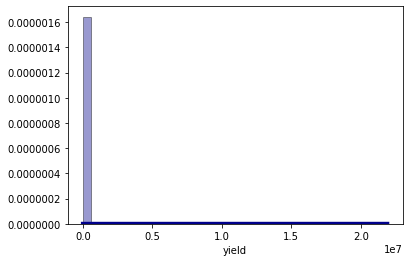

In [0]:
|# Density Plot and Histogram of all arrival delays
sns.distplot(final_train_merged['yield'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

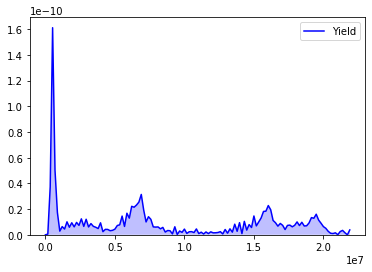

In [0]:
sns.kdeplot(final_train_merged["yield"], color='b', shade=True, Label='Yield') 

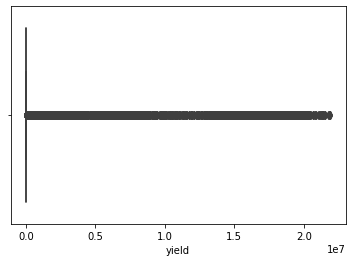

In [0]:
sns.boxplot("yield", data = final_train_merged)

#### **ingredient_type VS yield**

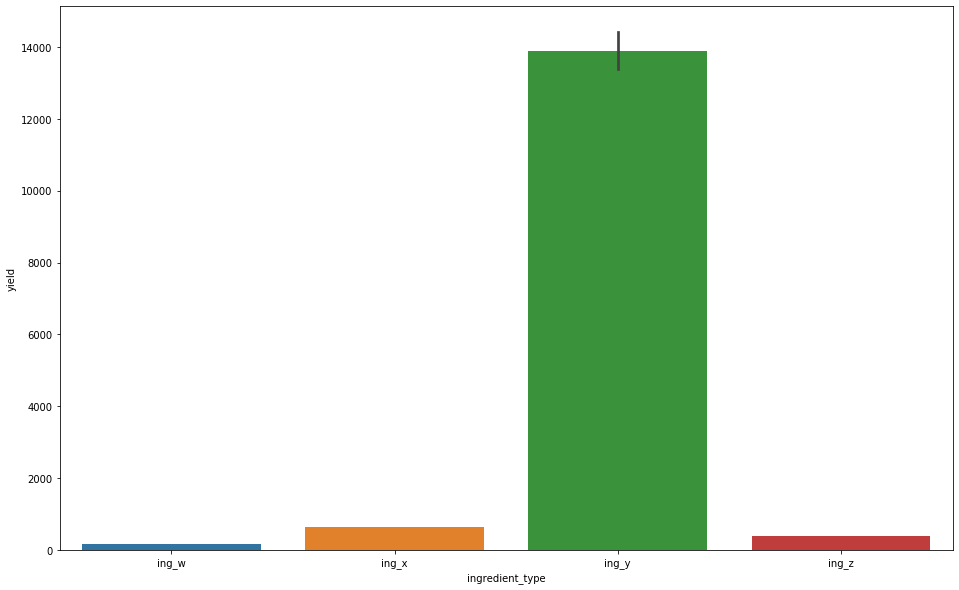

In [0]:
plt.figure(figsize = (16, 10))
sns.barplot(y = "yield", x = "ingredient_type", data = final_train_merged)

In [0]:
final_train_merged['month'] = final_train_merged['date'].dt.month

#### **Month wise how the yield is obtained for ingredient_type**

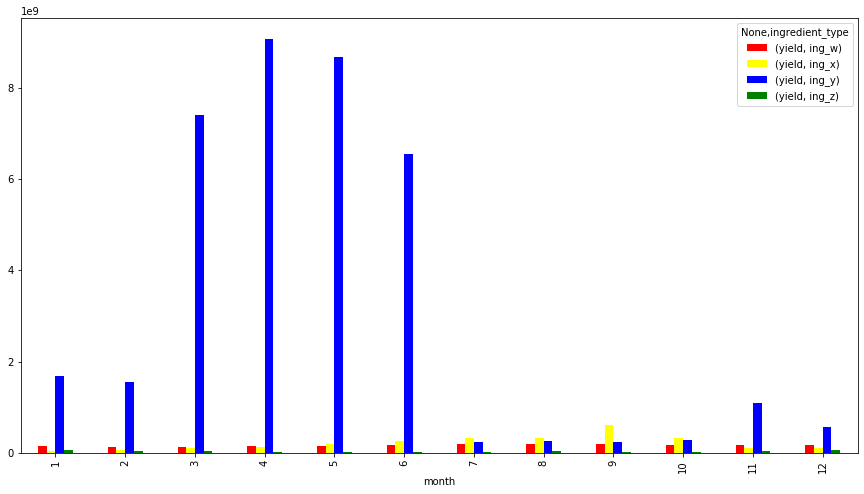

In [0]:
pd.DataFrame(final_train_merged.groupby(['month','ingredient_type'])['yield'].sum()).unstack().plot(kind = 'bar',figsize=(15,8),color =['red','yellow','blue','green'])


#### **Line chart of the month-wise yield for each ingredient. Summer seems good for ing_y**

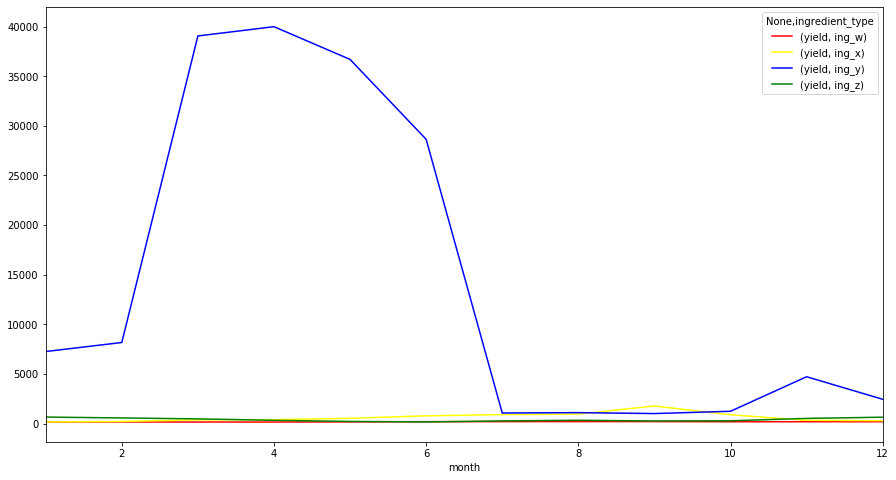

In [0]:
pd.DataFrame(final_train_merged.groupby(['month','ingredient_type'])['yield'].mean()).unstack().plot(kind = 'line',figsize=(15,8),color =['red','yellow','blue','green'])


#### **Which farming company produces which ingredient_type and what was the yield in the year 2016**

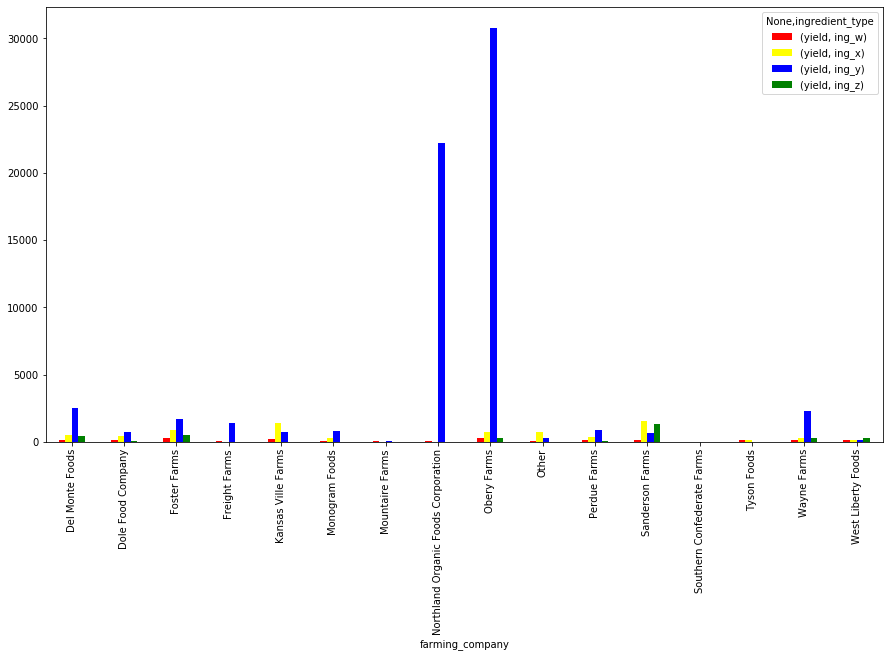

In [0]:
pd.DataFrame(final_train_merged.groupby(['farming_company','ingredient_type'])['yield'].mean()).unstack().plot(kind = 'bar',figsize=(15,8),color =['red','yellow','blue','green'])


#### **Location-wise yield**

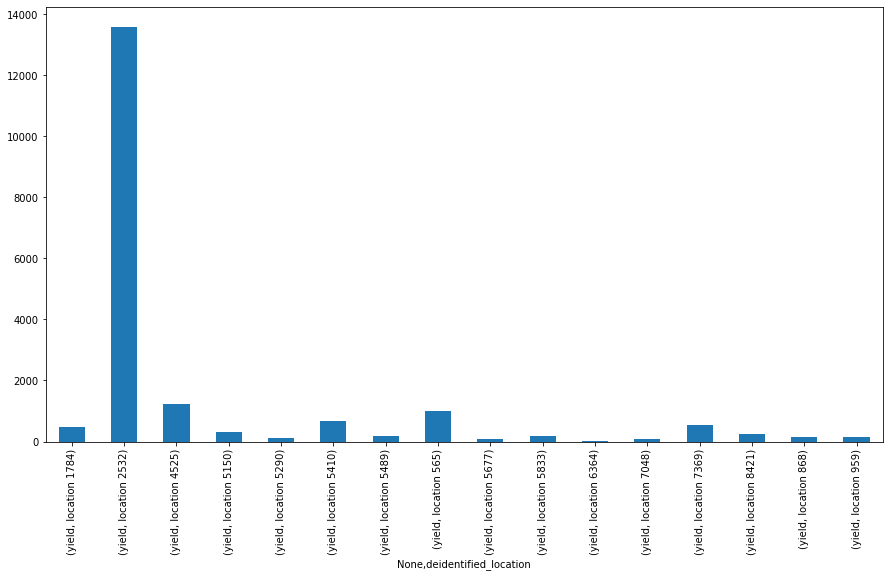

In [0]:
pd.DataFrame(final_train_merged.groupby(['deidentified_location'])['yield'].mean()).unstack().plot(kind = 'bar',figsize=(15,8))


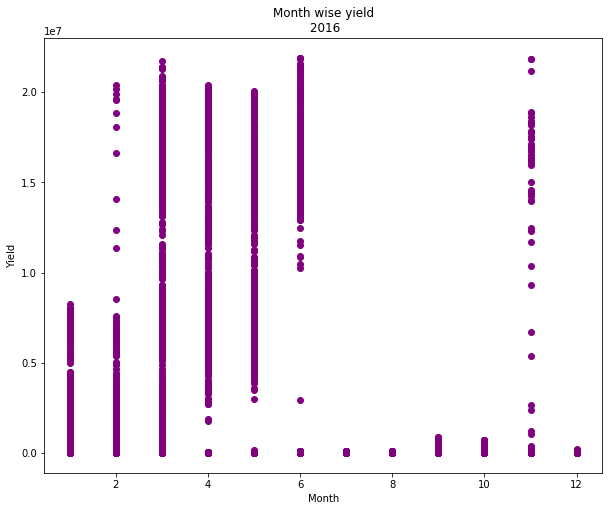

In [0]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(final_train_merged['month'], 
           final_train_merged["yield"], 
           color = 'purple')
ax.set(xlabel='Month', ylabel='Yield',
       title="Month wise yield\n 2016")
plt.show()

#### **Location-wise farm area and ingredient**

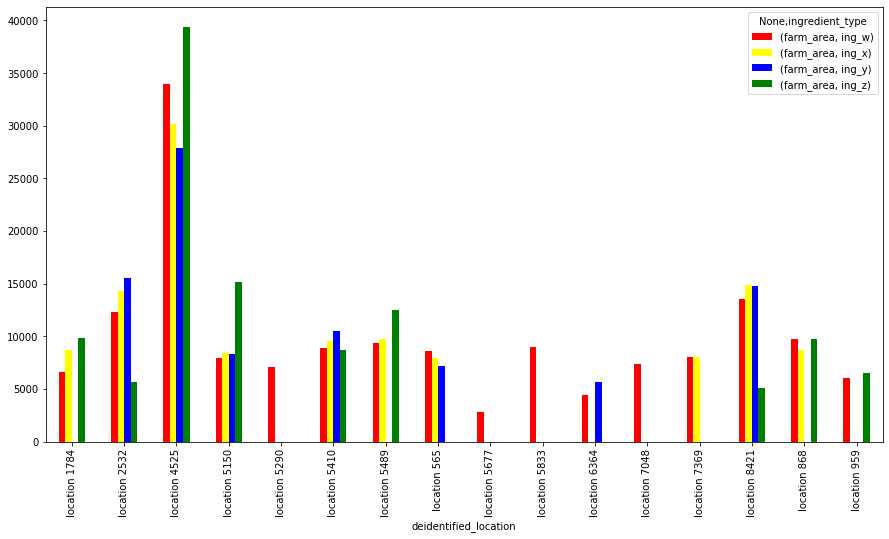

In [0]:
pd.DataFrame(final_train_merged.groupby(['deidentified_location','ingredient_type'])['farm_area'].mean()).unstack().plot(kind = 'bar',figsize=(15,8),color =['red','yellow','blue','green'])


#### **Location-wise temperature observed for the year 2016**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

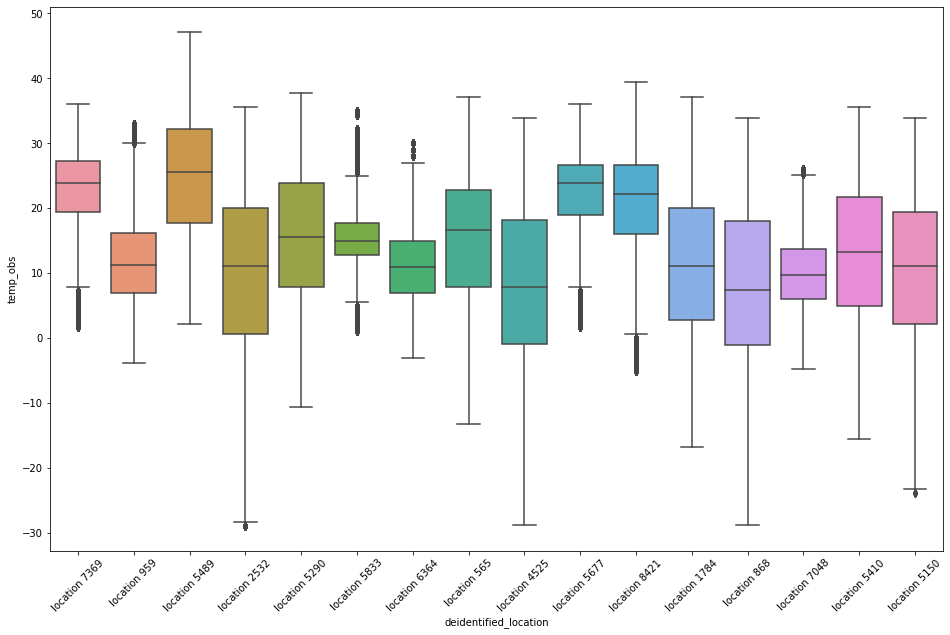

In [0]:
plt.figure(figsize = (16, 10))  

sns.boxplot(y = "temp_obs", x = "deidentified_location", data = final_train_merged)
plt.xticks(rotation = 45)

In [0]:
final_train_merged['weekday_name'] = final_train_merged['date'].dt.weekday_name

#### **Week-wise yield**

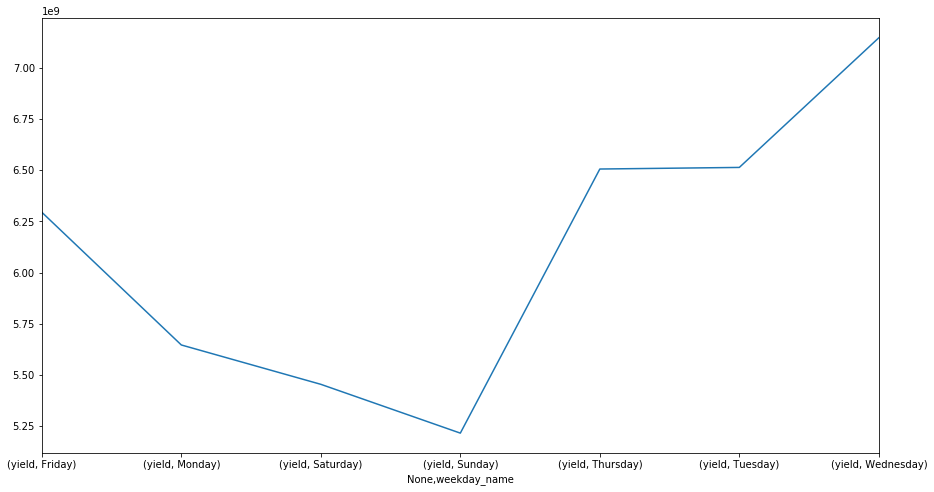

In [0]:
pd.DataFrame(final_train_merged.groupby(['weekday_name'])['yield'].sum()).unstack().plot(kind = 'line',figsize=(15,8))

#### **Location-wise precipitation**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

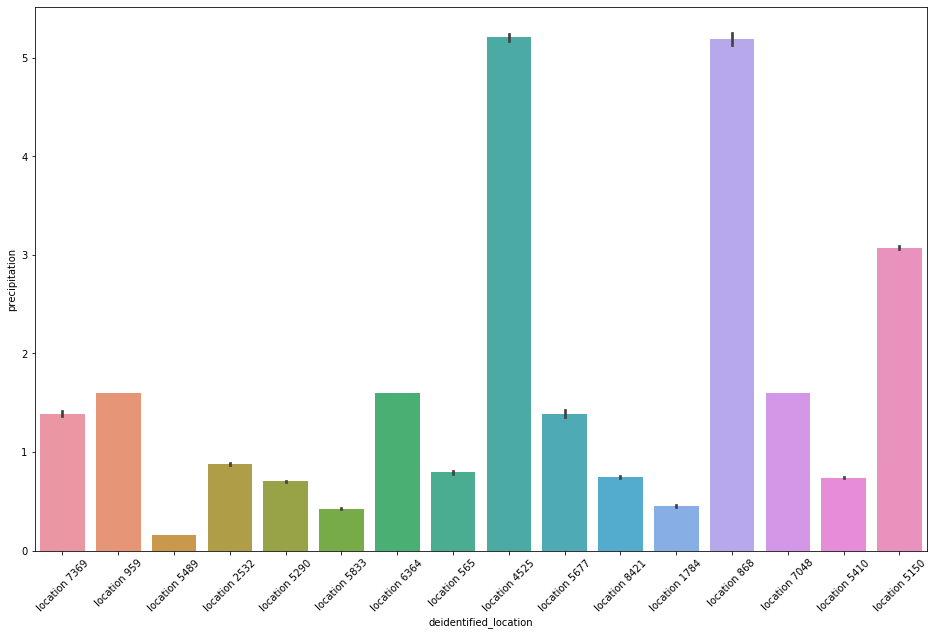

In [0]:
plt.figure(figsize = (16, 10))
sns.barplot(y = "precipitation", x = "deidentified_location", data = final_train_merged)
plt.xticks(rotation = 45)

In [0]:
final_train_merged.sample()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
19617978,2016-06-06 20:00:00,fid_34702,ing_y,227.779999,378.208099,Kansas Ville Farms,location 5150,2016-06-06 20:00:00,25.0,270.0,8.296875,1004.0,-1.0,7.199219


In [0]:
final_train_merged['dayofyear'] = final_train_merged['date'].dt.dayofyear
final_test_merged['dayofyear'] = final_test_merged['date'].dt.dayofyear

#### **Distribution of the temperature observed over the year**

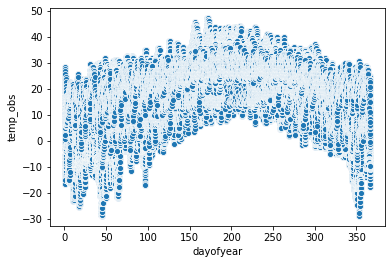

In [0]:
sns.scatterplot(x=final_train_merged['dayofyear'], y=final_train_merged['temp_obs']);

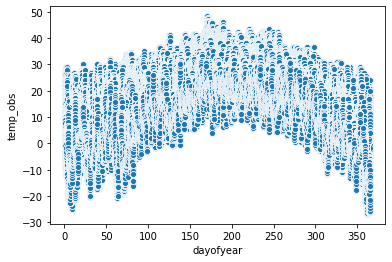

In [0]:
sns.scatterplot(x=final_test_merged['dayofyear'], y=final_test_merged['temp_obs']);

#### **How Precipitaion effects each ingredient_type**

Text(0, 0.5, 'yield')

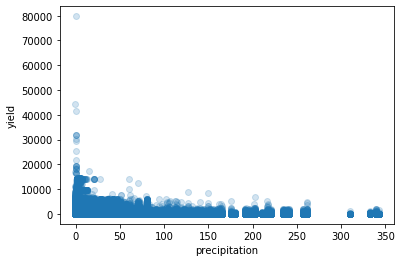

In [0]:
#testwithtarget[testwithtarget['ingredient_type']==0]
plt.scatter(final_train_merged[final_train_merged['ingredient_type']=="ing_w"]["precipitation"],final_train_merged[final_train_merged['ingredient_type']=="ing_w"]["yield"], alpha=0.2)
plt.xlabel("precipitation")
plt.ylabel("yield")

Text(0, 0.5, 'yield')

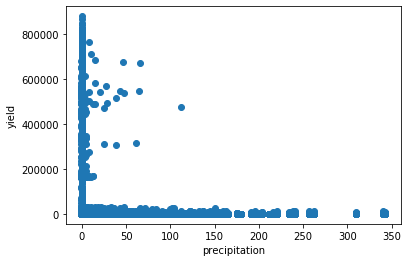

In [0]:
plt.scatter(final_train_merged[final_train_merged['ingredient_type']=="ing_x"]["precipitation"],final_train_merged[final_train_merged['ingredient_type']=="ing_x"]["yield"])
plt.xlabel("precipitation")
plt.ylabel("yield")

Text(0, 0.5, 'yield')

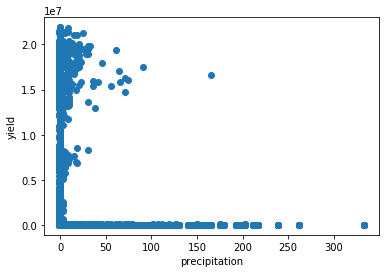

In [0]:
plt.scatter(final_train_merged[final_train_merged['ingredient_type']=="ing_y"]["precipitation"],final_train_merged[final_train_merged['ingredient_type']=="ing_y"]["yield"])
plt.xlabel("precipitation")
plt.ylabel("yield")

Text(0, 0.5, 'yield')

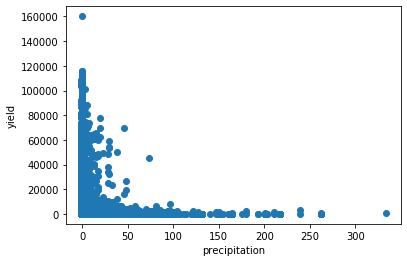

In [0]:
plt.scatter(final_train_merged[final_train_merged['ingredient_type']=="ing_z"]["precipitation"],final_train_merged[final_train_merged['ingredient_type']=="ing_z"]["yield"])
plt.xlabel("precipitation")
plt.ylabel("yield")

#### **Count plot**

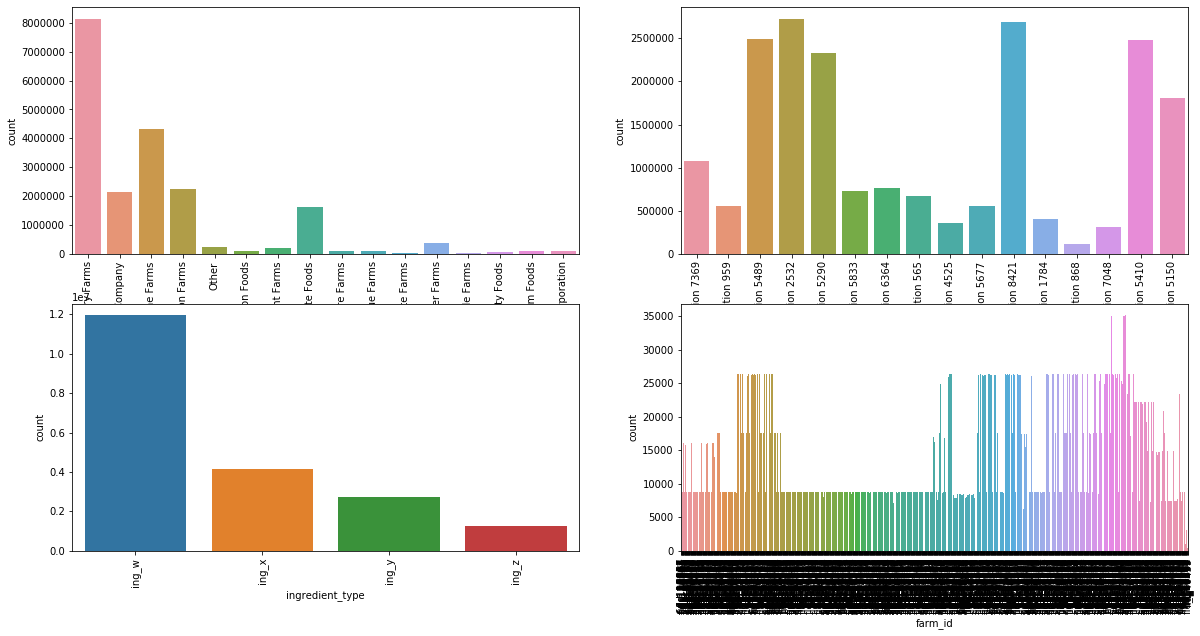

In [0]:
cat_cols= ["farming_company", 'deidentified_location' , 'ingredient_type', 'farm_id']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(cat_cols, ax.flatten()):
    sns.countplot(final_train_merged[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### **HeatMap**

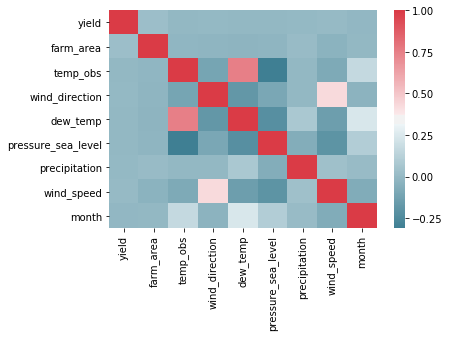

In [0]:
corr = final_train_merged.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

## Imputing the temp values in the final merged data of train, test

In [0]:
col_to_imputed_weather_again = ['temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level','wind_speed','precipitation']

In [0]:
final_test_merged['dayofyear'] = final_test_merged['date'].dt.dayofyear
final_train_merged['dayofyear'] = final_train_merged['date'].dt.dayofyear

In [0]:
final_train_merged[col_to_imputed_weather_again] = final_train_merged[col_to_imputed_weather_again].fillna(final_train_merged.groupby(['deidentified_location','dayofyear'])[col_to_imputed_weather_again].transform('mean'))

In [0]:
final_test_merged[col_to_imputed_weather_again] = final_test_merged[col_to_imputed_weather_again].fillna(final_test_merged.groupby(['deidentified_location','dayofyear'])[col_to_imputed_weather_again].transform('mean'))

In [0]:
final_test_merged.isnull().sum()

date                         0
farm_id                      0
ingredient_type              0
id                           0
farm_area                    0
farming_company              0
deidentified_location        0
timestamp                96155
temp_obs                 14784
wind_direction           14784
dew_temp                 14784
pressure_sea_level       14784
precipitation            14784
wind_speed               14784
dayofyear                    0
dtype: int64

In [0]:
final_train_merged.isnull().sum()

date                         0
farm_id                      0
ingredient_type              0
yield                        0
farm_area                    0
farming_company              0
deidentified_location        0
timestamp                89921
temp_obs                     0
wind_direction               0
dew_temp                     0
pressure_sea_level           0
precipitation                0
wind_speed                   0
dayofyear                    0
dtype: int64

In [0]:
final_train_merged.pressure_sea_level.value_counts().sort_values()

968.0          35
972.0          35
971.5          35
971.0          35
968.5          35
           ...   
1017.0     570469
1015.5     577088
1015.0     578948
1016.5     581674
1016.0    1440968
Name: pressure_sea_level, Length: 133, dtype: int64

In [0]:
final_test_merged[col_to_imputed_weather_again] = final_test_merged[col_to_imputed_weather_again].fillna(final_test_merged.groupby('deidentified_location')[col_to_imputed_weather_again].transform('mean'))

In [0]:
final_test_merged.isnull().sum()

date                         0
farm_id                      0
ingredient_type              0
id                           0
farm_area                    0
farming_company              0
deidentified_location        0
timestamp                96155
temp_obs                     0
wind_direction               0
dew_temp                     0
pressure_sea_level           0
precipitation                0
wind_speed                   0
dayofyear                    0
dtype: int64

In [0]:
# final_train_merged.drop("timestamp",axis=1,inplace=True)
# final_test_merged.drop("timestamp",axis=1,inplace=True)

In [0]:
# final_train_merged.fillna(train_weather.mean(), inplace=True)

In [0]:
# final_test_merged.fillna(test_weather.mean(), inplace=True)

In [0]:
final_train_merged.tail()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear
20080527,2016-12-31 19:00:00,fid_40459,ing_w,161.440491,3459.800537,Dole Food Company,location 7369,2016-12-31 19:00:00,22.796875,140.0,10.000000,1021.5,0.0,5.699219,366
20080528,2016-12-31 20:00:00,fid_40459,ing_w,161.940491,3459.800537,Dole Food Company,location 7369,2016-12-31 20:00:00,23.296875,170.0,8.898438,1021.0,0.0,4.101562,366
20080529,2016-12-31 21:00:00,fid_40459,ing_w,158.569000,3459.800537,Dole Food Company,location 7369,2016-12-31 21:00:00,23.296875,150.0,10.000000,1021.0,0.0,4.101562,366
20080530,2016-12-31 22:00:00,fid_40459,ing_w,156.371506,3459.800537,Dole Food Company,location 7369,2016-12-31 22:00:00,22.796875,160.0,10.000000,1021.0,0.0,3.099609,366
20080531,2016-12-31 23:00:00,fid_40459,ing_w,153.863998,3459.800537,Dole Food Company,location 7369,2016-12-31 23:00:00,20.593750,0.0,10.000000,1021.0,0.0,0.000000,366


In [0]:
final_test_merged.iloc[500:505,:]

,date,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear
500,2017-01-21 20:00:00,fid_110884,ing_w,64500,690.455078,Obery Farms,location 7369,2017-01-21 20:00:00,28.296875,190.0,15.000000,1009.5,0.0,6.199219,21
501,2017-01-21 21:00:00,fid_110884,ing_w,64629,690.455078,Obery Farms,location 7369,2017-01-21 21:00:00,27.796875,200.0,14.398438,1009.0,0.0,7.699219,21
502,2017-01-21 22:00:00,fid_110884,ing_w,64758,690.455078,Obery Farms,location 7369,2017-01-21 22:00:00,27.796875,200.0,15.000000,1009.0,0.0,4.101562,21
503,2017-01-21 23:00:00,fid_110884,ing_w,64887,690.455078,Obery Farms,location 7369,2017-01-21 23:00:00,26.093750,220.0,13.898438,1009.5,0.0,6.199219,21
504,2017-01-22 00:00:00,fid_110884,ing_w,65016,690.455078,Obery Farms,location 7369,2017-01-22 00:00:00,23.296875,220.0,13.898438,1010.0,0.0,2.599609,22


In [0]:
# import pickle
# final_train_merged.to_pickle("/content/drive/My Drive/phd/final_train_merged_dup_rem_b4_tts2.pickle") 
# final_test_merged.to_pickle("/content/drive/My Drive/phd/final_test_merged_final_dup_rem_b4_tts2.pickle")

In [0]:
# final_train_merged.to_csv("/content/drive/My Drive/phd/final_train_merged_4_before_split.csv",sep=',')
# final_test_merged.to_csv("/content/drive/My Drive/phd/final_test_merged_4_before_split.csv",sep=',')

## Zeros in target variable and how the higher yield values are

In [0]:
len(final_train_merged.loc[final_train_merged['yield']==0,:])

1868038

In [5]:
len(final_train_merged.loc[final_train_merged['yield']>500,:])

3102412

In [7]:
final_train_merged.loc[final_train_merged['yield']>500,:].sort_values(by = 'yield').tail()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear
13475365,2016-06-13 08:00:00,fid_72059,ing_y,21844500.0,30925.921875,Obery Farms,location 2532,2016-06-13 08:00:00,20.000000,140.0,17.203125,1013.0,8.0,3.599609,165
13482527,2016-11-09 14:00:00,fid_72059,ing_y,21847900.0,30925.921875,Obery Farms,location 2532,2016-11-09 14:00:00,3.900391,190.0,1.099609,1029.0,0.0,2.099609,314
13475221,2016-06-10 08:00:00,fid_72059,ing_y,21874500.0,30925.921875,Obery Farms,location 2532,2016-06-10 08:00:00,21.093750,140.0,17.796875,1007.0,0.0,6.199219,162
13475223,2016-06-10 09:00:00,fid_72059,ing_y,21889900.0,30925.921875,Obery Farms,location 2532,2016-06-10 09:00:00,21.093750,130.0,17.796875,1007.5,0.0,5.101562,162
13475367,2016-06-13 09:00:00,fid_72059,ing_y,21904700.0,30925.921875,Obery Farms,location 2532,2016-06-13 09:00:00,19.406250,50.0,17.203125,1014.5,0.0,6.199219,165


In [8]:
final_train_merged.loc[final_train_merged['yield']>500,:].sort_values(by = 'yield').sample(5)

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear
19173395,2016-04-24 01:00:00,fid_45973,ing_y,2262.520020,7074.842285,Sanderson Farms,location 5150,2016-04-24 01:00:00,3.900391,340.0,-6.101562,1019.5,1.599609,2.599609,115
16169090,2016-10-11 20:00:00,fid_102706,ing_x,694.807983,8874.652344,Del Monte Foods,location 5410,2016-10-11 20:00:00,17.796875,50.0,3.300781,1029.0,0.000000,2.099609,285
17449809,2016-06-11 13:00:00,fid_70655,ing_x,648.257996,1994.534546,Wayne Farms,location 5410,2016-06-11 13:00:00,20.000000,200.0,13.898438,1014.5,0.000000,3.599609,163
17533269,2016-01-26 10:00:00,fid_117459,ing_y,1017.429993,5782.468750,Obery Farms,location 5410,2016-01-26 10:00:00,-5.000000,0.0,-6.699219,1019.5,0.000000,0.000000,26
17175591,2016-05-15 08:00:00,fid_13336,ing_w,610.370972,15255.230469,Obery Farms,location 5410,2016-05-15 08:00:00,9.398438,300.0,0.600098,1007.0,0.000000,3.099609,136


In [10]:
final_train_merged.loc[final_train_merged['yield']>5000,:].sort_values(by = 'yield').head(5)

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear
8825424,2016-01-16 04:00:00,fid_118135,ing_w,5000.009766,16999.949219,Obery Farms,location 4525,2016-01-16 04:00:00,-8.203125,80.0,-11.500000,1002.5,4.800781,6.199219,16
8544884,2016-01-24 20:00:00,fid_80293,ing_y,5000.020020,30999.966797,Obery Farms,location 4525,2016-01-24 20:00:00,-6.699219,170.0,-12.000000,1016.5,1.599609,0.500000,24
17082653,2016-10-16 03:00:00,fid_43164,ing_x,5000.020020,41103.816406,Obery Farms,location 5410,2016-10-16 03:00:00,10.601562,0.0,7.199219,1026.0,0.000000,0.000000,290
17229929,2016-06-19 19:00:00,fid_33688,ing_x,5000.049805,18621.664062,Obery Farms,location 5410,2016-06-19 19:00:00,32.812500,132.5,11.101562,1023.0,0.000000,2.099609,171
8589102,2016-01-26 09:00:00,fid_51401,ing_z,5000.080078,67999.882812,Obery Farms,location 4525,2016-01-26 09:00:00,-2.500000,70.0,-5.500000,1009.5,2.500000,3.599609,26


In [0]:
# final_train_merged_without_outliers['female'] = final_train_merged_without_outliers['female'].map({'female': 1, 'male': 0})

In [0]:
final_train_merged_without_outliers.describe()

,Unnamed: 0,Unnamed: 0.1,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,dayofyear
count,2.021198e+07,2.021198e+07,2.021198e+07,2.021198e+07,2.021198e+07,20211985.0,2.021198e+07,20211985.0,2.021198e+07,2.021198e+07
mean,1.010752e+07,1.010752e+07,4.240051e+02,9.593404e+03,NaN,NaN,NaN,NaN,NaN,1.854881e+02
std,5.836289e+06,5.836289e+06,2.361275e+03,1.058829e+04,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,1.052650e+02
min,0.000000e+00,0.000000e+00,1.000000e-04,2.629155e+01,-2.890625e+01,0.0,-3.500000e+01,968.0,0.000000e+00,1.000000e+00
25%,5.052996e+06,5.052996e+06,1.830000e+01,3.079549e+03,8.296875e+00,80.0,0.000000e+00,1012.0,2.099609e+00,9.600000e+01
50%,1.010681e+07,1.010681e+07,7.873250e+01,6.778017e+03,1.670312e+01,170.0,8.898438e+00,1016.0,3.099609e+00,1.860000e+02
75%,1.516310e+07,1.516310e+07,2.676800e+02,1.301497e+04,2.390625e+01,270.0,1.609375e+01,1020.5,4.601562e+00,2.760000e+02
max,2.021610e+07,2.021610e+07,3.024510e+05,8.129012e+04,4.718750e+01,360.0,2.609375e+01,1046.0,1.900000e+01,3.660000e+02


In [0]:
# final_train_merged_without_outliers['yield'] = final_train_merged_without_outliers['yield'].replace(0, 0.01)

In [0]:
final_train_merged.describe()

,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,dayofyear
count,2.008053e+07,2.008053e+07,2.008053e+07,20080532.0,2.008053e+07,20080532.0,2.008053e+07,2.008053e+07
mean,2.054184e+03,1.006940e+04,NaN,NaN,NaN,NaN,NaN,1.854626e+02
std,1.537337e+05,1.090623e+04,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,1.052660e+02
min,0.000000e+00,2.629155e+01,-2.890625e+01,0.0,-3.500000e+01,968.0,0.000000e+00,1.000000e+00
25%,1.840900e+01,3.066914e+03,8.296875e+00,80.0,0.000000e+00,1012.0,2.099609e+00,9.600000e+01
50%,7.921790e+01,6.786007e+03,1.670312e+01,170.0,8.898438e+00,1016.0,3.099609e+00,1.860000e+02
75%,2.688330e+02,1.301497e+04,2.390625e+01,270.0,1.609375e+01,1020.5,4.601562e+00,2.760000e+02
max,2.190470e+07,8.129012e+04,4.718750e+01,360.0,2.609375e+01,1046.0,1.900000e+01,3.660000e+02


In [0]:
final_train_merged_without_outliers.describe()

,Unnamed: 0,Unnamed: 0.1,yield,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,dayofyear
count,2.021198e+07,2.021198e+07,2.021198e+07,2.021198e+07,2.021198e+07,20211985.0,2.021198e+07,20211985.0,2.021198e+07,2.021198e+07
mean,1.010752e+07,1.010752e+07,4.240051e+02,9.593404e+03,NaN,NaN,NaN,NaN,NaN,1.854881e+02
std,5.836289e+06,5.836289e+06,2.361275e+03,1.058829e+04,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,1.052650e+02
min,0.000000e+00,0.000000e+00,1.000000e-05,2.629155e+01,-2.890625e+01,0.0,-3.500000e+01,968.0,0.000000e+00,1.000000e+00
25%,5.052996e+06,5.052996e+06,1.830000e+01,3.079549e+03,8.296875e+00,80.0,0.000000e+00,1012.0,2.099609e+00,9.600000e+01
50%,1.010681e+07,1.010681e+07,7.873250e+01,6.778017e+03,1.670312e+01,170.0,8.898438e+00,1016.0,3.099609e+00,1.860000e+02
75%,1.516310e+07,1.516310e+07,2.676800e+02,1.301497e+04,2.390625e+01,270.0,1.609375e+01,1020.5,4.601562e+00,2.760000e+02
max,2.021610e+07,2.021610e+07,3.024510e+05,8.129012e+04,4.718750e+01,360.0,2.609375e+01,1046.0,1.900000e+01,3.660000e+02


In [0]:
final_train_merged_without_outliers.describe(include='all')

,Unnamed: 0,Unnamed: 0.1,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,dayofyear
count,2.021198e+07,2.021198e+07,20211985,20211985,20211985,2.021198e+07,2.021198e+07,20211985,20211985,20121686,2.021198e+07,20211985.0,2.021198e+07,20211985.0,2.021198e+07,2.021198e+07
unique,NaN,NaN,8784,1434,4,NaN,NaN,16,16,8784,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2016-12-27 22:00:00,fid_63700,ing_w,NaN,NaN,Obery Farms,location 2532,2016-12-27 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2370,51227,12060910,NaN,NaN,8199174,2752357,2370,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.010752e+07,1.010752e+07,NaN,NaN,NaN,4.240051e+02,9.593404e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.854881e+02
std,5.836289e+06,5.836289e+06,NaN,NaN,NaN,2.361275e+03,1.058829e+04,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,1.052650e+02
min,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.000000e+00,2.629155e+01,NaN,NaN,NaN,-2.890625e+01,0.0,-3.500000e+01,968.0,0.000000e+00,1.000000e+00
25%,5.052996e+06,5.052996e+06,NaN,NaN,NaN,1.830000e+01,3.079549e+03,NaN,NaN,NaN,8.296875e+00,80.0,0.000000e+00,1012.0,2.099609e+00,9.600000e+01


In [0]:
temptest.describe(include='all')

,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,dayofyear,day_name,day,month,quarter,is_month_end,is_month_start,hour,weekend_or_not_test,time_of_day
count,20848800,20848800,2.084880e+07,2.084880e+07,20848800,20848800,2.084880e+07,20848800.0,2.084880e+07,20848800.0,2.084880e+07,2.084880e+07,20848800,2.084880e+07,2.084880e+07,2.084880e+07,20848800,20848800,2.084880e+07,2.084880e+07,20848800
unique,1434,4,NaN,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,2,2,NaN,NaN,4
top,fid_63700,ing_w,NaN,NaN,Obery Farms,location 2532,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,NaN,NaN,NaN,False,False,NaN,NaN,Night
freq,52560,12377880,NaN,NaN,8435880,2750640,NaN,NaN,NaN,NaN,NaN,NaN,3027360,NaN,NaN,NaN,20163360,20163360,NaN,NaN,8687000
mean,NaN,NaN,1.981995e+07,9.547919e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.830000e+02,NaN,1.572055e+01,6.526027e+00,2.509589e+00,NaN,NaN,1.150000e+01,2.876712e-01,NaN
std,NaN,NaN,1.187348e+07,1.048108e+04,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,1.053660e+02,NaN,8.796247e+00,3.447851e+00,1.116767e+00,NaN,NaN,6.922187e+00,4.526770e-01,NaN
min,NaN,NaN,0.000000e+00,2.629155e+01,NaN,NaN,-2.679688e+01,0.0,-3.079688e+01,972.0,0.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,9.411522e+06,3.066914e+03,NaN,NaN,8.500000e+00,80.0,7.001953e-01,1011.0,2.099609e+00,9.200000e+01,NaN,8.000000e+00,4.000000e+00,2.000000e+00,NaN,NaN,5.750000e+00,0.000000e+00,NaN
50%,NaN,NaN,2.023914e+07,6.778017e+03,NaN,NaN,1.670312e+01,180.0,8.898438e+00,1015.5,3.099609e+00,1.830000e+02,NaN,1.600000e+01,7.000000e+00,3.000000e+00,NaN,NaN,1.150000e+01,0.000000e+00,NaN
75%,NaN,NaN,2.898360e+07,1.291138e+04,NaN,NaN,2.390625e+01,270.0,1.600000e+01,1020.0,4.601562e+00,2.740000e+02,NaN,2.300000e+01,1.000000e+01,4.000000e+00,NaN,NaN,1.725000e+01,1.000000e+00,NaN


In [0]:
import pandas as pd
import pickle
final_train_merged = pd.read_pickle("/content/drive/My Drive/phd/final_train_merged_dup_rem_b4_tts2.pickle")
final_test_merged = pd.read_pickle("/content/drive/My Drive/phd/final_test_merged_final_dup_rem_b4_tts2.pickle")

In [0]:
final_train_merged.head()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 00:00:00,25.000000,0.0,20.00000,1019.5,-0.17395,0.000000,1
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 01:00:00,24.406250,70.0,21.09375,1020.0,-1.00000,1.500000,1
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 02:00:00,22.796875,0.0,21.09375,1020.0,0.00000,0.000000,1
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 03:00:00,21.093750,0.0,20.59375,1020.0,0.00000,0.000000,1
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,690.455078,Obery Farms,location 7369,2016-01-01 04:00:00,20.000000,250.0,20.00000,1020.0,-1.00000,2.599609,1


In [0]:
# pip install tsfresh

In [0]:
# >>> from tsfresh.feature_extraction import ComprehensiveFCParameters
# >>> settings = ComprehensiveFCParameters()
# >>> # Set here the options of the settings object as shown in the paragraphs below
# >>> # ...
# >>> from tsfresh.feature_extraction import extract_features
# >>> extract_features(df, default_fc_parameters=settings)

## Removing outliers

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(final_train_merged["yield"]))
print(z)

[0.01385537 0.01385537 0.01385537 ... 0.01282404 0.01283833 0.01285464]


In [0]:
threshold = 1.96
#print(np.where(z >1.96 ))

In [0]:
final_train_merged_zscores = list(np.where(z > 1.96))

In [0]:
final_train_merged_zscores2 = list(np.where(z < 1.96))

In [0]:
len(final_train_merged_zscores[0])

4113

In [0]:
len(final_train_merged_zscores2[0])

20076419

In [0]:
final_train_merged_without_outliers = final_train_merged[(z < 1.96)]

In [0]:
final_train_merged_without_outliers.shape

(20076419, 15)

# Train validation Split

In [0]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x = final_train_merged_without_outliers.copy().drop('yield',axis=1)

In [0]:
x.shape

(20076419, 14)

In [0]:
y = final_train_merged_without_outliers['yield']

In [0]:
y.shape

(20076419,)

In [0]:
trainx, validationx, trainy, validationy = train_test_split(x,y,test_size= 0.25,random_state=24)

In [0]:
print(trainx.shape)
print(trainy.shape)
print(validationx.shape)
print(validationy.shape)

(15057314, 14)
(15057314,)
(5019105, 14)
(5019105,)


### Extracting features from date and time 

In [0]:
trainx['weekday'] = trainx['date'].dt.weekday
trainx['day_name'] = trainx['date'].dt.weekday_name
trainx['dayofyear'] = trainx['date'].dt.dayofyear
#trainx['weekofyear'] = trainx['date'].dt.weekofyear
trainx['day'] = trainx['date'].dt.day
trainx['month'] = trainx['date'].dt.month
trainx['quarter'] = trainx['date'].dt.quarter
trainx['is_month_end'] = trainx['date'].dt.is_month_end
trainx['is_month_start'] = trainx['date'].dt.is_month_start
# trainx['is_quarter_end'] = trainx['date'].dt.is_quarter_end
# trainx['is_quarter_start'] = trainx['date'].dt.is_quarter_start
trainx['hour'] = trainx['date'].dt.hour


In [0]:
validationx['weekday'] = validationx['date'].dt.weekday
validationx['day_name'] = validationx['date'].dt.weekday_name
validationx['dayofyear'] = validationx['date'].dt.dayofyear
#validationx['weekofyear'] = validationx['date'].dt.weekofyear
validationx['day'] = validationx['date'].dt.day
validationx['month'] = validationx['date'].dt.month
validationx['quarter'] = validationx['date'].dt.quarter
validationx['is_month_end'] = validationx['date'].dt.is_month_end
validationx['is_month_start'] = validationx['date'].dt.is_month_start
# validationx['is_quarter_end'] = validationx['date'].dt.is_quarter_end
# validationx['is_quarter_start'] = validationx['date'].dt.is_quarter_start
validationx['hour'] = validationx['date'].dt.hour

In [0]:
final_test_merged['weekday'] = final_test_merged['date'].dt.weekday
final_test_merged['day_name'] = final_test_merged['date'].dt.weekday_name
final_test_merged['dayofyear'] = final_test_merged['date'].dt.dayofyear
#final_test_merged['weekofyear'] = final_test_merged['date'].dt.weekofyear
final_test_merged['day'] = final_test_merged['date'].dt.day
final_test_merged['month'] = final_test_merged['date'].dt.month
final_test_merged['quarter'] = final_test_merged['date'].dt.quarter
final_test_merged['is_month_end'] = final_test_merged['date'].dt.is_month_end
final_test_merged['is_month_start'] = final_test_merged['date'].dt.is_month_start
# final_test_merged['is_quarter_end'] = final_test_merged['date'].dt.is_quarter_end
# final_test_merged['is_quarter_start'] = final_test_merged['date'].dt.is_quarter_start
final_test_merged['hour'] = final_test_merged['date'].dt.hour

In [0]:
trainx.head()

,date,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour
10453036,2016-01-21 16:00:00,fid_14114,ing_y,13675.786133,Obery Farms,location 8421,2016-01-21 16:00:00,16.703125,158.5,12.796875,1014.0,0.000000,2.099609,21,3,Thursday,21,1,1,False,False,16
16660246,2016-04-27 02:00:00,fid_46229,ing_x,3066.913818,Obery Farms,location 5410,2016-04-27 02:00:00,11.703125,100.0,10.000000,1008.0,0.000000,6.199219,118,2,Wednesday,27,4,2,False,False,2
16450558,2016-02-17 05:00:00,fid_80706,ing_w,2201.986816,Wayne Farms,location 5410,2016-02-17 05:00:00,2.800781,290.0,-2.199219,1010.0,0.000000,3.099609,48,2,Wednesday,17,2,1,False,False,5
5124301,2016-01-12 10:00:00,fid_17291,ing_w,10219.330078,Obery Farms,location 5290,2016-01-12 10:00:00,-0.600098,170.0,-9.398438,1017.0,0.000000,3.599609,12,1,Tuesday,12,1,1,False,False,10
7451410,2016-09-17 21:00:00,fid_45384,ing_w,1294.974976,Obery Farms,location 6364,2016-09-17 21:00:00,15.000000,360.0,12.000000,1016.0,1.599609,2.099609,261,5,Saturday,17,9,3,False,False,21


In [0]:
final_test_merged.sample(5)

,date,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour
2806085,2017-10-11 09:00:00,fid_66920,ing_z,5314777,4613.749023,Obery Farms,location 5489,2017-10-11 09:00:00,22.796875,110.000,3.900391,1009.0,0.0,2.099609,284,2,Wednesday,11,10,4,False,False,9
12594357,2017-11-27 05:00:00,fid_25038,ing_w,22086798,10069.942383,Obery Farms,location 8421,2017-11-27 05:00:00,15.000000,0.000,11.101562,1022.0,0.0,0.000000,331,0,Monday,27,11,4,False,False,5
9722855,2017-11-30 23:00:00,fid_55217,ing_w,18997979,79.896584,Sanderson Farms,location 5677,2017-11-30 23:00:00,22.203125,30.000,16.093750,1018.5,0.0,5.101562,334,3,Thursday,30,11,4,True,False,23
17975725,2017-07-04 16:00:00,fid_26605,ing_x,33430042,1453.838989,Wayne Farms,location 5410,2017-07-04 16:00:00,26.703125,216.625,17.203125,1017.5,0.0,2.099609,185,1,Tuesday,4,7,3,False,False,16
3892181,2017-08-28 14:00:00,fid_65693,ing_x,5011162,7231.940918,Sanderson Farms,location 5489,2017-08-28 14:00:00,32.187500,80.000,12.203125,1009.5,0.0,4.601562,240,0,Monday,28,8,3,False,False,14


In [0]:
trainx.tail()

,date,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour
18335988,2016-07-28 14:00:00,fid_29039,ing_w,1704.026855,Obery Farms,location 5150,2016-07-28 14:00:00,25.593750,180.0,17.203125,1014.0,1.599609,2.599609,210,3,Thursday,28,7,3,False,False,14
5184719,2016-12-31 10:00:00,fid_109740,ing_w,8000.806152,Sanderson Farms,location 5290,2016-12-31 10:00:00,-1.099609,210.0,-7.199219,1021.5,0.000000,1.500000,366,5,Saturday,31,12,4,True,False,10
7221371,2016-07-10 22:00:00,fid_116054,ing_w,1716.011353,Foster Farms,location 6364,2016-07-10 22:00:00,16.000000,250.0,13.000000,1016.0,1.599609,7.199219,192,6,Sunday,10,7,3,False,False,22
5657729,2016-10-13 05:00:00,fid_115088,ing_w,4274.188477,Del Monte Foods,location 5290,2016-10-13 05:00:00,13.898438,220.0,12.796875,1021.5,0.000000,1.500000,287,3,Thursday,13,10,4,False,False,5
18041041,2016-03-11 09:00:00,fid_26870,ing_z,7867.769043,Sanderson Farms,location 5410,2016-03-11 09:00:00,15.000000,10.0,10.000000,1013.5,-1.000000,7.699219,71,4,Friday,11,3,1,False,False,9


### Weekend or not

In [0]:
weekend_or_not_train= []
for i in trainx["weekday"]:
  if(i == 5 or i ==6):
     weekend_or_not_train.append(1)
  else:
      weekend_or_not_train.append(0)

In [0]:
weekend_or_not_validation= []
for i in validationx["weekday"]:
  if(i == 5 or i ==6):
     weekend_or_not_validation.append(1)
  else:
      weekend_or_not_validation.append(0)

In [0]:
weekend_or_not_test= []
for i in final_test_merged["weekday"]:
  if(i == 5 or i ==6):
     weekend_or_not_test.append(1)
  else:
      weekend_or_not_test.append(0)

In [0]:
weekend_or_not_train_df = pd.DataFrame(weekend_or_not_train,columns= ['weekend_or_not_train'])
weekend_or_not_validation_df = pd.DataFrame(weekend_or_not_validation,columns= ['weekend_or_not_validation'])
weekend_or_not_test_df = pd.DataFrame(weekend_or_not_test,columns= ['weekend_or_not_test'])

In [0]:
trainx.head()

,date,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour
10453036,2016-01-21 16:00:00,fid_14114,ing_y,13675.786133,Obery Farms,location 8421,2016-01-21 16:00:00,16.703125,158.5,12.796875,1014.0,0.000000,2.099609,21,3,Thursday,21,1,1,False,False,16
16660246,2016-04-27 02:00:00,fid_46229,ing_x,3066.913818,Obery Farms,location 5410,2016-04-27 02:00:00,11.703125,100.0,10.000000,1008.0,0.000000,6.199219,118,2,Wednesday,27,4,2,False,False,2
16450558,2016-02-17 05:00:00,fid_80706,ing_w,2201.986816,Wayne Farms,location 5410,2016-02-17 05:00:00,2.800781,290.0,-2.199219,1010.0,0.000000,3.099609,48,2,Wednesday,17,2,1,False,False,5
5124301,2016-01-12 10:00:00,fid_17291,ing_w,10219.330078,Obery Farms,location 5290,2016-01-12 10:00:00,-0.600098,170.0,-9.398438,1017.0,0.000000,3.599609,12,1,Tuesday,12,1,1,False,False,10
7451410,2016-09-17 21:00:00,fid_45384,ing_w,1294.974976,Obery Farms,location 6364,2016-09-17 21:00:00,15.000000,360.0,12.000000,1016.0,1.599609,2.099609,261,5,Saturday,17,9,3,False,False,21


In [0]:
weekend_or_not_train_df.head()

,weekend_or_not_train
0,0
1,0
2,0
3,0
4,1


In [0]:
weekend_or_not_train_df.tail()

,weekend_or_not_train
15057309,0
15057310,1
15057311,1
15057312,0
15057313,0


In [0]:
trainx.tail()

,date,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour
18335988,2016-07-28 14:00:00,fid_29039,ing_w,1704.026855,Obery Farms,location 5150,2016-07-28 14:00:00,25.593750,180.0,17.203125,1014.0,1.599609,2.599609,210,3,Thursday,28,7,3,False,False,14
5184719,2016-12-31 10:00:00,fid_109740,ing_w,8000.806152,Sanderson Farms,location 5290,2016-12-31 10:00:00,-1.099609,210.0,-7.199219,1021.5,0.000000,1.500000,366,5,Saturday,31,12,4,True,False,10
7221371,2016-07-10 22:00:00,fid_116054,ing_w,1716.011353,Foster Farms,location 6364,2016-07-10 22:00:00,16.000000,250.0,13.000000,1016.0,1.599609,7.199219,192,6,Sunday,10,7,3,False,False,22
5657729,2016-10-13 05:00:00,fid_115088,ing_w,4274.188477,Del Monte Foods,location 5290,2016-10-13 05:00:00,13.898438,220.0,12.796875,1021.5,0.000000,1.500000,287,3,Thursday,13,10,4,False,False,5
18041041,2016-03-11 09:00:00,fid_26870,ing_z,7867.769043,Sanderson Farms,location 5410,2016-03-11 09:00:00,15.000000,10.0,10.000000,1013.5,-1.000000,7.699219,71,4,Friday,11,3,1,False,False,9


### Morning Evening night

In [0]:
time_of_day_train= []
for i in trainx["hour"]:
  if(i >6.0 and i <=11.0):
     time_of_day_train.append("Morning")
  elif(i >11.0 and i <=16.0):
     time_of_day_train.append("Afternoon")
  elif(i >16.0 and i <=20.0):
     time_of_day_train.append("Evening")
  else:
      time_of_day_train.append('Night')

In [0]:
time_of_day_val= []
for i in validationx["hour"]:
  if(i >6.0 and i <=11.0):
     time_of_day_val.append("Morning")
  elif(i >11.0 and i <=16.0):
     time_of_day_val.append("Afternoon")
  elif(i >16.0 and i <=20.0):
     time_of_day_val.append("Evening")
  else:
      time_of_day_val.append('Night')

In [0]:
time_of_day_test= []
for i in final_test_merged["hour"]:
  if(i >6.0 and i <=11.0):
     time_of_day_test.append("Morning")
  elif(i >11.0 and i <=16.0):
     time_of_day_test.append("Afternoon")
  elif(i >16.0 and i <=20.0):
     time_of_day_test.append("Evening")
  else:
      time_of_day_test.append('Night')

In [0]:
time_of_day_train_df = pd.DataFrame(time_of_day_train,columns= ['time_of_day'])
time_of_day_val_df = pd.DataFrame(time_of_day_val,columns= ['time_of_day'])
time_of_day_test_df = pd.DataFrame(time_of_day_test,columns= ['time_of_day'])

In [0]:
trainx.reset_index(inplace=True)
validationx.reset_index(inplace=True)
final_test_merged.reset_index(inplace=True)

In [0]:
final_test_merged.head()

,index,date,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour
0,0,2017-01-01 00:00:00,fid_110884,ing_w,0,690.455078,Obery Farms,location 7369,2017-01-01 00:00:00,17.796875,100.0,11.703125,1021.5,0.0,3.599609,1,6,Sunday,1,1,1,False,True,0
1,1,2017-01-01 01:00:00,fid_110884,ing_w,129,690.455078,Obery Farms,location 7369,2017-01-01 01:00:00,17.796875,130.0,12.796875,1022.0,0.0,3.099609,1,6,Sunday,1,1,1,False,True,1
2,2,2017-01-01 02:00:00,fid_110884,ing_w,258,690.455078,Obery Farms,location 7369,2017-01-01 02:00:00,16.093750,140.0,12.796875,1022.0,0.0,3.099609,1,6,Sunday,1,1,1,False,True,2
3,3,2017-01-01 03:00:00,fid_110884,ing_w,387,690.455078,Obery Farms,location 7369,2017-01-01 03:00:00,17.203125,140.0,13.296875,1022.0,0.0,3.099609,1,6,Sunday,1,1,1,False,True,3
4,4,2017-01-01 04:00:00,fid_110884,ing_w,516,690.455078,Obery Farms,location 7369,2017-01-01 04:00:00,16.703125,130.0,13.296875,1022.5,0.0,2.599609,1,6,Sunday,1,1,1,False,True,4


In [0]:
temptrain = pd.concat([trainx,weekend_or_not_train_df,time_of_day_train_df],axis=1)

In [0]:
tempval = pd.concat([validationx,weekend_or_not_validation_df,time_of_day_val_df],axis=1)


In [0]:
temptest = pd.concat([final_test_merged,weekend_or_not_test_df,time_of_day_test_df],axis=1)

In [0]:
temptest.shape

(20848800, 26)

### Dropping unneceassary columns

In [0]:
#,'Unnamed: 0','Unnamed: 0.1
temptrain.drop(["index",'date','timestamp','weekday'],axis=1, inplace = True)
tempval.drop(["index",'date','timestamp','weekday'],axis=1, inplace = True)
temptest.drop(["index",'date','timestamp','weekday'],axis=1, inplace = True)

In [0]:
temptest2 = temptest.copy().drop('id',axis=1)

In [0]:
temptest2.shape

(20848800, 21)

In [0]:
id_col = temptest['id']

In [0]:
id_col.shape

(20848800,)

In [0]:
tempval.dtypes

farm_id                        object
ingredient_type              category
farm_area                     float64
farming_company                object
deidentified_location          object
temp_obs                      float16
wind_direction                float16
dew_temp                      float16
pressure_sea_level            float16
precipitation                 float16
wind_speed                    float16
dayofyear                       int64
day_name                       object
day                             int64
month                           int64
quarter                         int64
is_month_end                     bool
is_month_start                   bool
hour                            int64
weekend_or_not_validation       int64
time_of_day                    object
dtype: object

In [0]:
cat_cols = ['farm_id', 'ingredient_type', 'farming_company','deidentified_location','day_name','dayofyear','day','month','quarter','hour','time_of_day']

In [0]:
temptrain[cat_cols] = temptrain[cat_cols].astype("category")

In [0]:
tempval[cat_cols] = tempval[cat_cols].astype("category")

In [0]:
temptest2[cat_cols] = temptest2[cat_cols].astype("category")

## Label Encoding

In [0]:
#label encoding the categorical columns
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder1 = preprocessing.LabelEncoder() 
label_encoder2 = preprocessing.LabelEncoder() 
label_encoder3 = preprocessing.LabelEncoder() 
label_encoder4 = preprocessing.LabelEncoder() 
label_encoder5 = preprocessing.LabelEncoder() 
#label_encoder6 = preprocessing.LabelEncoder() 
#label_encoder7 = preprocessing.LabelEncoder() 
#label_encoder8 = preprocessing.LabelEncoder() 
#label_encoder9 = preprocessing.LabelEncoder() 
#label_encoder10 = preprocessing.LabelEncoder() 
#label_encoder11 = preprocessing.LabelEncoder() 



In [0]:
# Encode labels in column target. 
label_encoder1.fit(temptrain["farm_id"])
label_encoder2.fit(temptrain["farming_company"])
label_encoder3.fit(temptrain["ingredient_type"])
label_encoder4.fit(temptrain["deidentified_location"])
#label_encoder5.fit(temptrain["day_name"])
#label_encoder6.fit(temptrain["dayofyear"])
#label_encoder7.fit(temptrain["day"])
#label_encoder8.fit(temptrain["month"])
#label_encoder9.fit(temptrain["quarter"])
#label_encoder10.fit(temptrain["hour"])
#label_encoder11.fit(temptrain["time_of_day"])

LabelEncoder()

#### Label encoding for train

In [0]:

temptrain["farm_id"] =  label_encoder1.transform(temptrain["farm_id"])
temptrain['farming_company'] = label_encoder2.transform(temptrain["farming_company"]) 
temptrain['ingredient_type'] = label_encoder3.transform(temptrain["ingredient_type"]) 
temptrain['deidentified_location'] = label_encoder4.transform(temptrain["deidentified_location"]) 


In [0]:
#temptrain['day_name'] = label_encoder5.transform(temptrain["day_name"]) 
#temptrain['dayofyear'] = label_encoder6.transform(temptrain["dayofyear"]) 
#temptrain['day'] = label_encoder7.transform(temptrain["day"]) 


In [0]:
# #temptrain['month'] = label_encoder8.transform(temptrain["month"]) 
# temptrain['quarter'] = label_encoder9.transform(temptrain["quarter"]) 
# temptrain['hour'] = label_encoder10.transform(temptrain["hour"]) 
#temptrain['time_of_day'] = label_encoder11.transform(temptrain["time_of_day"]) 


In [0]:
temptrain.head()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day_name,day,month,quarter,is_month_end,is_month_start,hour,weekend_or_not_train,time_of_day
0,324,2,13675.786133,8,13,16.703125,158.5,12.796875,1014.0,0.000000,2.099609,21,Thursday,21,1,1,False,False,16,0,Afternoon
1,762,1,3066.913818,8,5,11.703125,100.0,10.000000,1008.0,0.000000,6.199219,118,Wednesday,27,4,2,False,False,2,0,Night
2,1202,0,2201.986816,14,5,2.800781,290.0,-2.199219,1010.0,0.000000,3.099609,48,Wednesday,17,2,1,False,False,5,0,Night
3,371,0,10219.330078,8,4,-0.600098,170.0,-9.398438,1017.0,0.000000,3.599609,12,Tuesday,12,1,1,False,False,10,0,Morning
4,746,0,1294.974976,8,10,15.000000,360.0,12.000000,1016.0,1.599609,2.099609,261,Saturday,17,9,3,False,False,21,1,Night


#### Label encoding for validation

In [0]:
tempval['farm_id'] = label_encoder1.transform(tempval["farm_id"])
tempval['farming_company'] = label_encoder2.transform(tempval["farming_company"]) 
tempval['ingredient_type'] = label_encoder3.transform(tempval["ingredient_type"]) 
tempval['deidentified_location'] = label_encoder4.transform(tempval["deidentified_location"]) 


In [0]:
#tempval['day_name'] = label_encoder5.transform(tempval["day_name"]) 
# tempval['dayofyear'] = label_encoder6.transform(tempval["dayofyear"]) 
# tempval['day'] = label_encoder7.transform(tempval["day"]) 


In [0]:
# tempval['month'] = label_encoder8.transform(tempval["month"]) 
# tempval['quarter'] = label_encoder9.transform(tempval["quarter"]) 
# tempval['hour'] = label_encoder10.transform(tempval["hour"]) 
#tempval['time_of_day'] = label_encoder11.transform(tempval["time_of_day"]) 


In [0]:
tempval.head()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day_name,day,month,quarter,is_month_end,is_month_start,hour,weekend_or_not_validation,time_of_day
0,703,0,3904.527344,7,1,25.593750,360.0,10.601562,1021.0,0.0,4.601562,244,Wednesday,31,8,3,True,False,23,0,Night
1,944,2,18546.041016,8,13,17.203125,360.0,15.000000,1014.0,0.0,1.500000,53,Monday,22,2,1,False,False,10,0,Morning
2,1336,1,5999.954590,8,2,11.898438,60.0,10.601562,1019.5,8.0,1.000000,294,Thursday,20,10,4,False,False,20,0,Evening
3,865,0,2700.039795,0,9,12.203125,200.0,8.296875,1025.0,0.0,2.099609,84,Thursday,24,3,1,False,False,11,0,Morning
4,128,0,7799.856934,14,12,22.203125,80.0,15.601562,1022.5,0.0,1.500000,147,Thursday,26,5,2,False,False,3,0,Night


#### Label encoding for test

In [0]:
temptest2['farm_id'] = label_encoder1.transform(temptest2["farm_id"]) 
temptest2['farming_company'] = label_encoder2.transform(temptest2["farming_company"]) 
temptest2['ingredient_type'] = label_encoder3.transform(temptest2["ingredient_type"]) 
temptest2['deidentified_location'] = label_encoder4.transform(temptest2["deidentified_location"]) 


In [0]:
#temptest2['day_name'] = label_encoder5.transform(temptest2["day_name"]) 
# temptest['dayofyear'] = label_encoder6.transform(temptest["dayofyear"]) 
# temptest['day'] = label_encoder7.transform(temptest["day"]) 


In [0]:
# temptest['month'] = label_encoder8.transform(temptest["month"]) 
# temptest['quarter'] = label_encoder9.transform(temptest["quarter"]) 
# temptest['hour'] = label_encoder10.transform(temptest["hour"]) 
#temptest2['time_of_day'] = label_encoder11.transform(temptest2["time_of_day"]) 


In [0]:
temptest2.tail()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day_name,day,month,quarter,is_month_end,is_month_start,hour,weekend_or_not_test,time_of_day
20848795,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,Thursday,28,12,4,False,False,7,0,Morning
20848796,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,Thursday,28,12,4,False,False,8,0,Morning
20848797,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,Thursday,28,12,4,False,False,9,0,Morning
20848798,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,Thursday,28,12,4,False,False,10,0,Morning
20848799,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,Thursday,28,12,4,False,False,11,0,Morning


## Dummification

In [0]:
cols_to_dummi = ['is_month_end', 'is_month_start', 'day_name','time_of_day']

In [0]:
temptrain= pd.get_dummies(temptrain,columns=cols_to_dummi,drop_first=True)

In [0]:
tempval= pd.get_dummies(tempval,columns= cols_to_dummi,drop_first=True)

In [0]:
temptest2= pd.get_dummies(temptest2,columns= cols_to_dummi,drop_first=True)

In [0]:
temptest2.sample(10)

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day,month,quarter,hour,weekend_or_not_test,is_month_end_True,is_month_start_True,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
3976755,918,0,3921.807129,14,6,15.000000,100.0,4.398438,1021.0,0.0,1.500000,354,20,12,4,3,0,0,0,0,0,0,0,0,1,0,0,1
6718665,45,0,1423.831421,8,9,5.601562,320.0,2.800781,1024.0,0.0,3.099609,355,21,12,4,10,0,0,0,0,0,0,1,0,0,0,1,0
885781,1340,0,192.309204,9,12,12.796875,0.0,12.203125,1023.5,0.0,0.000000,43,12,2,1,13,1,0,0,0,0,1,0,0,0,0,0,0
7272235,1429,0,3781.709473,8,9,12.203125,280.0,7.800781,1030.0,0.0,3.599609,60,1,3,1,20,0,0,1,0,0,0,0,0,1,1,0,0
3443300,1369,3,18806.818359,14,6,22.203125,0.0,5.601562,1015.5,0.0,0.000000,131,11,5,2,6,0,0,0,0,0,0,1,0,0,0,0,1
11482717,448,1,30885.324219,14,13,3.900391,310.0,0.000000,1023.0,0.0,3.099609,343,9,12,4,10,1,0,0,0,1,0,0,0,0,0,1,0
10553795,1322,2,10370.111328,8,13,31.703125,0.0,21.703125,1017.0,0.0,0.000000,216,4,8,3,16,0,0,0,0,0,0,0,0,0,0,0,0
17131068,684,0,25384.257812,8,5,16.703125,10.0,10.601562,1023.0,0.0,2.099609,238,26,8,3,10,1,0,0,0,1,0,0,0,0,0,1,0
14187178,450,0,8099.934082,14,1,12.796875,350.0,3.300781,1011.0,0.0,5.699219,282,9,10,4,5,0,0,0,1,0,0,0,0,0,0,0,1
6995583,36,0,1716.290039,8,9,15.601562,230.0,13.296875,1014.0,0.0,1.500000,213,1,8,3,16,0,0,1,0,0,0,0,1,0,0,0,0


## Target Encoding

In [0]:
# # Type of tagert encoder :
# def calc_smooth_mean(df, by, on, m):
#     # Compute the global mean
#     mean = df[on].mean()

#     # Compute the number of values and the mean of each group
#     agg = df.groupby(by)[on].agg(['count', 'mean'])
#     counts = agg['count']
#     means = agg['mean']

#     # Compute the "smoothed" means
#     smooth = (counts * means + m * mean) / (counts + m)

#     # Replace each value by the according smoothed mean
#     return df[by].map(smooth)

# temptrain['farm_id'] = calc_smooth_mean(final_train_merged_without_outliers, by='farm_id', on='yield', m=300)
# temptrain['farming_company'] = calc_smooth_mean(final_train_merged_without_outliers, by='farming_company', on='yield', m=300)
# temptrain['deidentified_location'] = calc_smooth_mean(final_train_merged_without_outliers, by='deidentified_location', on='yield', m=300)


# tempval['farm_id'] = calc_smooth_mean(final_train_merged_without_outliers, by='farm_id', on='yield', m=300)
# tempval['farming_company'] = calc_smooth_mean(final_train_merged_without_outliers, by='farming_company', on='yield', m=300)
# tempval['deidentified_location'] = calc_smooth_mean(final_train_merged_without_outliers, by='deidentified_location', on='yield', m=300)

# temptest2['farm_id'] = calc_smooth_mean(final_train_merged_without_outliers, by='farm_id', on='yield', m=300)
# temptest2['farming_company'] = calc_smooth_mean(final_train_merged_without_outliers, by='farming_company', on='yield', m=300)
# temptest2['deidentified_location'] = calc_smooth_mean(final_train_merged_without_outliers, by='deidentified_location', on='yield', m=300)


In [0]:
cattonum = ['farm_id','farming_company','deidentified_location']

In [0]:
temptrain.dtypes

farm_id                  category
farm_area                 float32
farming_company          category
deidentified_location    category
temp_obs                  float16
wind_direction            float16
dew_temp                  float16
pressure_sea_level        float16
wind_speed                float16
dayofyear                category
day                      category
month                    category
quarter                  category
hour                     category
weekend_or_not_train        int64
is_month_end_True           uint8
is_month_start_True         uint8
day_name_Monday             uint8
day_name_Saturday           uint8
day_name_Sunday             uint8
day_name_Thursday           uint8
day_name_Tuesday            uint8
day_name_Wednesday          uint8
time_of_day_Evening         uint8
time_of_day_Morning         uint8
time_of_day_Night           uint8
ingredient_type_ing_x       uint8
ingredient_type_ing_y       uint8
ingredient_type_ing_z       uint8
dtype: object

In [0]:
final_test_merged.tail()

,index,date,farm_id,ingredient_type,id,farm_area,farming_company,deidentified_location,timestamp,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,weekday,day_name,day,month,quarter,is_month_end,is_month_start,hour
20848795,20848795,2017-12-28 07:00:00,fid_34139,ing_w,41673195,8572.25293,Wayne Farms,location 5150,NaT,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,3,Thursday,28,12,4,False,False,7
20848796,20848796,2017-12-28 08:00:00,fid_34139,ing_w,41673445,8572.25293,Wayne Farms,location 5150,NaT,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,3,Thursday,28,12,4,False,False,8
20848797,20848797,2017-12-28 09:00:00,fid_34139,ing_w,41673695,8572.25293,Wayne Farms,location 5150,NaT,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,3,Thursday,28,12,4,False,False,9
20848798,20848798,2017-12-28 10:00:00,fid_34139,ing_w,41673945,8572.25293,Wayne Farms,location 5150,NaT,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,3,Thursday,28,12,4,False,False,10
20848799,20848799,2017-12-28 11:00:00,fid_34139,ing_w,41674195,8572.25293,Wayne Farms,location 5150,NaT,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,3,Thursday,28,12,4,False,False,11


In [0]:
final_train_merged.deidentified_location.value_counts()

location 2532    2720548
location 8421    2688123
location 5489    2488575
location 5410    2476590
location 5290    2327580
location 5150    1802071
location 7369    1076662
location 6364     771031
location 5833     734865
location 565      668133
location 5677     559540
location 959      553357
location 1784     411407
location 4525     366681
location 7048     315910
location 868      119459
Name: deidentified_location, dtype: int64

In [0]:
final_test_merged.deidentified_location.value_counts()

location 2532    2750640
location 8421    2706840
location 5489    2505360
location 5410    2496600
location 5290    2365200
location 5150    2181240
location 7369    1138800
location 5833     805920
location 6364     788400
location 565      700800
location 5677     604440
location 959      551880
location 1784     438000
location 4525     367920
location 7048     324120
location 868      122640
Name: deidentified_location, dtype: int64

In [0]:
temptest2.tail(5)

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day,month,quarter,hour,weekend_or_not_test,is_month_end_True,is_month_start_True,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
20848795,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,7,0,0,0,0,0,0,1,0,0,0,1,0
20848796,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,8,0,0,0,0,0,0,1,0,0,0,1,0
20848797,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,9,0,0,0,0,0,0,1,0,0,0,1,0
20848798,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,10,0,0,0,0,0,0,1,0,0,0,1,0
20848799,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,11,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
ids_test  = temptest['id']

In [0]:
import pickle
temptrain.to_pickle("/content/drive/My Drive/phd/temptrain_dup_rem_b4_mod5.pickle") 
tempval.to_pickle("/content/drive/My Drive/phd/tempval_dup_rem_b4_mod5.pickle")
temptest2.to_pickle("/content/drive/My Drive/phd/temptest2_dup_rem_b4_mod5.pickle") 
validationy.to_pickle("/content/drive/My Drive/phd/validationy_dup_rem_b4_mod5.pickle")
trainy.to_pickle("/content/drive/My Drive/phd/trainy_dup_rem_b4_mod5.pickle") 
ids_test.to_pickle("/content/drive/My Drive/phd/ids_test_dup_rem_b4_mod5.pickle") 

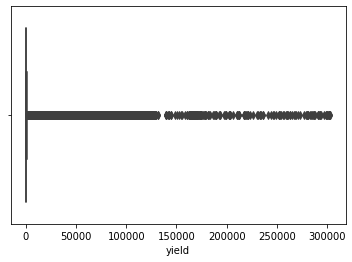

In [0]:
sns.boxplot(trainy)

In [0]:
import pickle
import pandas as pd
temptrain = pd.read_pickle("/content/drive/My Drive/phd/temptrain_dup_rem_b4_mod5.pickle")
tempval = pd.read_pickle("/content/drive/My Drive/phd/tempval_dup_rem_b4_mod5.pickle")
temptest2 = pd.read_pickle("/content/drive/My Drive/phd/temptest2_dup_rem_b4_mod5.pickle")
validationy = pd.read_pickle("/content/drive/My Drive/phd/validationy_dup_rem_b4_mod5.pickle")
trainy = pd.read_pickle("/content/drive/My Drive/phd/trainy_dup_rem_b4_mod5.pickle") 
ids_test = pd.read_pickle("/content/drive/My Drive/phd/ids_test_dup_rem_b4_mod5.pickle")

In [0]:
temptrain.head()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day,month,quarter,hour,weekend_or_not_train,is_month_end_True,is_month_start_True,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,324,2,13675.786133,8,13,16.703125,158.5,12.796875,1014.0,0.000000,2.099609,21,21,1,1,16,0,0,0,0,0,0,1,0,0,0,0,0
1,762,1,3066.913818,8,5,11.703125,100.0,10.000000,1008.0,0.000000,6.199219,118,27,4,2,2,0,0,0,0,0,0,0,0,1,0,0,1
2,1202,0,2201.986816,14,5,2.800781,290.0,-2.199219,1010.0,0.000000,3.099609,48,17,2,1,5,0,0,0,0,0,0,0,0,1,0,0,1
3,371,0,10219.330078,8,4,-0.600098,170.0,-9.398438,1017.0,0.000000,3.599609,12,12,1,1,10,0,0,0,0,0,0,0,1,0,0,1,0
4,746,0,1294.974976,8,10,15.000000,360.0,12.000000,1016.0,1.599609,2.099609,261,17,9,3,21,1,0,0,0,1,0,0,0,0,0,0,1


In [0]:
print(temptrain.shape)
print(tempval.shape)
print(temptest2.shape)

(15057314, 28)
(5019105, 28)
(20848800, 29)


In [0]:
temptest2.head()

,level_0,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day,month,quarter,hour,weekend_or_not_test,is_month_end_True,is_month_start_True,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,0,142,0,690.455078,8,12,17.796875,100.0,11.703125,1021.5,0.0,3.599609,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1
1,1,142,0,690.455078,8,12,17.796875,130.0,12.796875,1022.0,0.0,3.099609,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1
2,2,142,0,690.455078,8,12,16.093750,140.0,12.796875,1022.0,0.0,3.099609,1,1,1,1,2,1,0,1,0,0,1,0,0,0,0,0,1
3,3,142,0,690.455078,8,12,17.203125,140.0,13.296875,1022.0,0.0,3.099609,1,1,1,1,3,1,0,1,0,0,1,0,0,0,0,0,1
4,4,142,0,690.455078,8,12,16.703125,130.0,13.296875,1022.5,0.0,2.599609,1,1,1,1,4,1,0,1,0,0,1,0,0,0,0,0,1


In [0]:
temptest2.drop("level_0",axis = 1, inplace=True)

In [0]:
ids_test[:5]

0      0
1    129
2    258
3    387
4    516
Name: id, dtype: int32

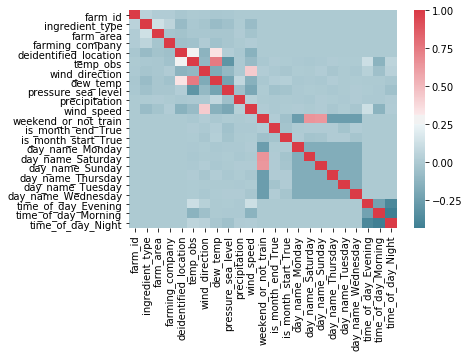

In [0]:
import seaborn as sns
corr = temptrain.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [0]:
temptrain.drop("dew_temp",axis=1,inplace = True)
tempval.drop("dew_temp",axis=1,inplace = True)
temptest2.drop("dew_temp",axis=1,inplace = True)

## Models

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
# Non linear models regression metrics
def regression_error_metrics(trainy, trainy_pred, testy, testy_pred):

    mse_train = mean_squared_error(trainy, trainy_pred)
    mse_test = mean_squared_error(validationy, testy_pred)

    rmse_train = np.sqrt(mean_squared_error(trainy, trainy_pred))
    rmse_test = np.sqrt(mean_squared_error(validationy, testy_pred))

    mae_train = mean_absolute_error(trainy, trainy_pred)
    mae_test = mean_absolute_error(validationy, testy_pred)

    # printing values


    print('mean squared error for train: ', mse_train)
    print('mean squared error for validation: ', mse_test)
    print('root mean squared error for train: ', rmse_train)
    print('root mean squared error validation: ', rmse_test)
    print('mean absolute error for train: ', mae_train)
    print('mean absolute error for validation: ', mae_test)
    print('mean absolute percentage error for train: ', mean_absolute_percentage_error(trainy, trainy_pred))
    print('mean absolute percentage error for validation: ', mean_absolute_percentage_error(validationy, testy_pred))

### Linear Regression after dummification

In [0]:
reg = LinearRegression()

In [0]:
import numpy as np

In [0]:
#Fit the data(train the model)
model= reg.fit(temptrain, trainy)
# Predict
y_pred = model.predict(temptrain)
y_pred_test = model.predict(tempval)
# model evaluation
mse = mean_squared_error(trainy, y_pred)
rmse_train = np.sqrt(mean_squared_error(trainy, y_pred))
rmse_test = np.sqrt(mean_squared_error(validationy, y_pred_test))
mae = mean_absolute_error(trainy, y_pred)


r2 =model.score(temptrain, trainy)
# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('mean squared error: ', mse)
print('root mean squared error train: ', rmse_train)
print('root mean squared error test: ', rmse_test)
print('mean absolute error: ', mae)
print('mean absolute percentage error for train: ', mean_absolute_percentage_error(trainy, y_pred))
print('mean absolute percentage error for test: ', mean_absolute_percentage_error(validationy, y_pred_test))

print('R2 score: ', r2)

Slope: [-1.45286293e-01  4.45799615e-02  8.34511374e+00 -3.34569420e+01
 -1.00272932e+01  1.65653971e-01  5.38659650e+00  2.37405107e+00
 -2.53519610e+00  2.04639995e+01  4.01914377e+00 -3.78513175e+00
 -1.14705769e+02 -1.99580251e+01  2.00646626e+00 -2.46178396e+01
 -2.83503337e+01 -2.63767024e+01 -1.70703431e+00 -8.90830407e+00
 -1.57095355e+01  8.64181918e+00  8.57703006e+00  8.75877368e+00
 -8.23432319e+00  4.56044273e-01 -4.11664552e+01  2.13925656e+02
  1.12323819e+03  1.42127286e+02]
Intercept: -2222.1393776628224
mean squared error:  5188397.6952103805
root mean squared error train:  2277.8054559620277
root mean squared error test:  2302.1401513270107
mean absolute error:  579.3657781905465
mean absolute percentage error for train:  inf
mean absolute percentage error for test:  inf
R2 score:  0.08417912657136806


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
y_pred_test_main = model.predict(temptest2)

In [0]:
ids_test  = temptest['id']

In [0]:
output_sub_lin_nodup_noout = pd.DataFrame({'id':ids_test,"yield":y_pred_test_main})

In [0]:
output_sub_lin_nodup_noout.head(5)

,id,yield
0,0,-391.349957
8760,1,-580.137898
17520,2,-433.863136
26280,3,-322.900352
35040,4,-62.004600


In [0]:
output_sub_lin_nodup_noout.sample(5)

,id,yield
8653552,16538705,282.281196
13056606,25228615,273.907153
9081996,17833737,569.179518
7611364,15489942,-193.868089
9890258,18452211,-305.980189


In [0]:
output_sub_lin_nodup_noout.sort_values(by = 'id',inplace=True)

In [0]:
# output_sub_lin_nodup_noout.to_pickle("/content/drive/My Drive/phd/output_sub_lin_nodup_noout.pickle")

In [0]:
output_sub_lin_nodup_noout.to_csv("/content/drive/My Drive/phd/output_sub_lin_nodup_noout.csv", index = False)

In [0]:
# You tree will give more "importance" to the datapoints that are duplicated because the loss function will double count the error from those datapoints.

# If every single datapoint was duplicated, then the resulting decision tree would not be any different. What is important is the ratio of duplicated datapoints to the number of non-duplicated dataponts, not the size of the dataset itself. (Except if you consider running time...)

# Sometimes "duplicate" datapoints are legitimate, and those should not be thrown away.

In [0]:
# The parameters for decision trees are often based on record counts -- minimum leaf size and minimum split search size come to mind. In addition, purity measures are affected by the size of nodes as the tree is being built. When you have duplicated records, then you are implicitly putting a weight on the values in those rows.

# This is neither good nor bad. You simply need to understand the data and the model that you want to build. If the duplicated values arise from different runs of an experiment, then they should be fine.

# In some cases, duplicates (or equivalently weights) can be quite bad. For instance, if you are oversampling the data to get a balanced sample on the target, then the additional rows would be problematic. A single leaf might end up consisting of a single instance from the original data -- and overfitting would be a problem.

## Decision Tree

In [0]:
dt_reg=tree.DecisionTreeRegressor()
dt_reg.fit(temptrain,trainy)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred_train_reg = dt_reg.predict(temptrain)


In [0]:
pred_test_reg = dt_reg.predict(tempval)

In [0]:
pred_test_data_reg = dt_reg.predict(temptest2)

In [0]:
regression_error_metrics(trainy, pred_train_reg, validationy, pred_test_reg)

mean squared error for train:  9.008170695060033e-11
mean squared error for validation:  788015.2893628037
root mean squared error for train:  9.491138337976133e-06
root mean squared error validation:  887.7022526516442
mean absolute error for train:  2.5326897643625223e-07
mean absolute error for validation:  55.75612544330613
mean absolute percentage error for train:  nan
mean absolute percentage error for validation:  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
pred_test_data_reg[:5]

array([0., 0., 0., 0., 0.])

In [0]:
ids_test  = temptest['id']

In [0]:
# pred_test_data_reg

In [0]:
output_sub_dt_nodup_noout = pd.DataFrame({'id':ids_test,"yield":pred_test_data_reg})

In [0]:
output_sub_dt_nodup_noout.head(5)

,id,yield
0,0,0.0
1,129,0.0
2,258,0.0
3,387,0.0
4,516,0.0


In [0]:
output_sub_dt_nodup_noout.sample(5)

,id,yield
15101864,28506151,46651.500000
8993025,16761765,316.049988
19926827,39116714,926.090027
3323729,4548407,0.000000
14959547,29186240,1947.880005


In [0]:
output_sub_dt_nodup_noout.sort_values(by = 'id',inplace=True)

In [0]:
output_sub_dt_nodup_noout.head()

,id,yield
0,0,0.0
8760,1,0.0
17520,2,0.0
26280,3,0.0
35040,4,0.0


In [0]:
output_sub_dt_nodup_noout.describe()

,id,yield
count,2.084880e+07,2.084880e+07
mean,1.981995e+07,4.484460e+02
std,1.187348e+07,2.766811e+03
min,0.000000e+00,0.000000e+00
25%,9.411522e+06,1.830000e+01
50%,2.023914e+07,7.898035e+01
75%,2.898360e+07,2.684000e+02
max,4.169685e+07,3.032690e+05


In [0]:
output_sub_dt_nodup_noout.to_csv("/content/drive/My Drive/phd/output_sub_dt_nodup_noout.csv", index = False)

In [0]:
submission_file.head()

,id,yield
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
submission_file.tail()

,id,yield
20848795,41696845,0
20848796,41696846,0
20848797,41696847,0
20848798,41696848,0
20848799,41696849,0


In [0]:
output_sub_dt_nodup_noout = pd.read_csv("/content/drive/My Drive/phd/output_sub_dt_nodup_noout.csv")

In [0]:
output_sub_dt_nodup_noout.head()

,id,yield
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [0]:
output_sub_dt_nodup_noout.tail()

,id,yield
20848795,41696845,0.000000
20848796,41696846,299.217987
20848797,41696847,380.000000
20848798,41696848,0.000000
20848799,41696849,140.048996


In [0]:
output_sub_dt_nodup_noout.iloc[999995:999999,:]

,id,yield
999995,999995,615.156982
999996,999996,1477.359985
999997,999997,539.905029
999998,999998,701.671997


In [0]:
submission_file2 = pd.read_csv("/content/drive/My Drive/phd/sample_submission2.csv")

In [0]:
submission_file2.head()

,id,yield
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
submission_file2.shape

(999999, 2)

In [0]:
submission_file2.tail()

,id,yield
999994,999995,0
999995,999996,0
999996,999997,0
999997,999998,0
999998,999999,0


In [0]:
submission_file2.drop("yield",axis = 1, inplace = True)

In [0]:
new_sub_dt = pd.merge(submission_file2, output_sub_dt_nodup_noout,how = 'left', left_on = "id",right_on = 'id')

In [0]:
new_sub_dt.head()

,id,yield
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [0]:
new_sub_dt.tail()

,id,yield
999994,999995,615.156982
999995,999996,1477.359985
999996,999997,539.905029
999997,999998,701.671997
999998,999999,5234.080078


In [0]:
new_sub_dt.shape

(999999, 2)

In [0]:
new_sub_dt.to_csv("/content/drive/My Drive/phd/new_sub.csv", index = False)

### Learning curves for noraml Decision Tree

In [0]:
from mlxtend.plotting import plot_learning_curves

([84.69893316019308,
  137.11456393092143,
  201.41214925572228,
  251.0842475344816,
  317.7274878840823,
  386.0856972411882,
  451.79974692280996,
  522.9118858125253,
  590.5281200093797,
  656.4414040241893],
 [1691816.4756183336,
  1183974.9519216092,
  1168728.920801785,
  989748.6264299365,
  878634.6636366124,
  893760.6067926612,
  845690.9899653681,
  722068.4682446673,
  754096.8823768698,
  662539.4779365637])

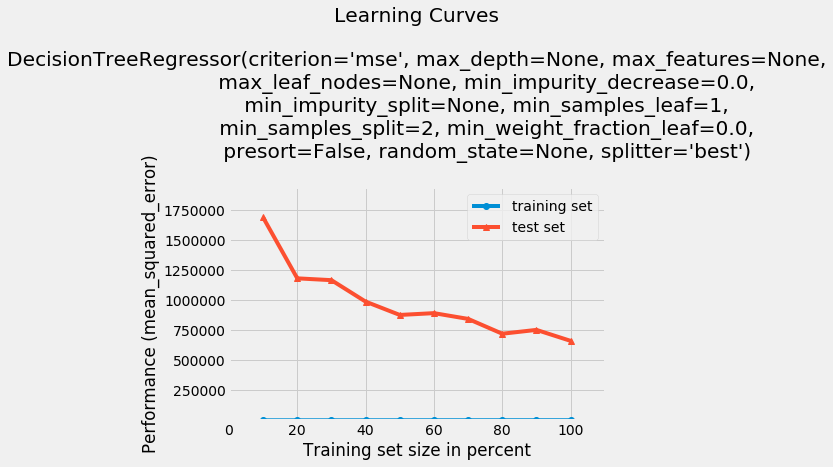

In [0]:
plot_learning_curves(temptrain, trainy, tempval, validationy, dt_reg, scoring='mean_squared_error')

## Decision Tree with hyperparameter

In [0]:
dt_reg_hp=tree.DecisionTreeRegressor(min_samples_split = 100)
dt_reg_hp.fit(temptrain,trainy)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
pred_train_dt_reg_hp = dt_reg_hp.predict(temptrain)


In [0]:
pred_test_dt_reg_hp = dt_reg_hp.predict(tempval)

In [0]:
pred_test_main_dt_reg_hp = dt_reg_hp.predict(temptest2)

In [0]:
regression_error_metrics(trainy, pred_train_dt_reg_hp, validationy, pred_test_dt_reg_hp)

mean squared error for train:  570586.8616350845
mean squared error for validation:  793210.21273417
root mean squared error for train:  755.3720021519757
root mean squared error validation:  890.6234966214231
mean absolute error for train:  62.92374753475082
mean absolute error for validation:  70.1721542696784
mean absolute percentage error for train:  nan
mean absolute percentage error for validation:  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
pred_test_main_dt_reg_hp[:5]

array([0., 0., 0., 0., 0.])

In [0]:
ids_test[:5]

0      0
1    129
2    258
3    387
4    516
Name: id, dtype: int32

In [0]:
output_sub_dt_hp_nodup_noout = pd.DataFrame({'id':ids_test,"yield":pred_test_main_dt_reg_hp})

In [0]:
output_sub_dt_hp_nodup_noout.head(5)

,id,yield
0,0,0.0
1,129,0.0
2,258,0.0
3,387,0.0
4,516,0.0


In [0]:
output_sub_dt_hp_nodup_noout.sample(5)

,id,yield
19432220,38869908,781.308583
14368490,27386244,0.000000
1458824,2553948,50.352941
7907751,15360656,4.230137
20386306,37347269,2.225919


In [0]:
output_sub_dt_hp_nodup_noout.sort_values(by = 'id',inplace=True)

In [0]:
output_sub_dt_hp_nodup_noout.head()

,id,yield
0,0,0.000000
8760,1,0.000000
17520,2,0.069345
26280,3,0.000000
35040,4,0.000000


In [0]:
output_sub_dt_hp_nodup_noout.describe()

,id,yield
count,2.084880e+07,2.084880e+07
mean,1.981995e+07,4.418216e+02
std,1.187348e+07,2.295914e+03
min,0.000000e+00,0.000000e+00
25%,9.411522e+06,2.092304e+01
50%,2.023914e+07,8.237833e+01
75%,2.898360e+07,2.736702e+02
max,4.169685e+07,2.838040e+05


In [0]:
output_sub_dt_hp_nodup_noout.tail()

,id,yield
13210078,41696845,0.000000
13210079,41696846,260.186351
13236357,41696847,409.729508
13236358,41696848,0.000000
13236359,41696849,183.222025


In [0]:
output_sub_dt_hp_nodup_noout.to_csv("/content/drive/My Drive/phd/output_sub_dt_hp_nodup_noout.csv", index = False)

In [0]:
output_sub_dt_hp_nodup_noout.shape

(20848800, 2)

In [0]:

submission_file = pd.read_csv("/content/drive/My Drive/phd/sample_submission.csv")

In [0]:
submission_file.shape

(20848800, 2)

In [0]:
submission_file.head()

,id,yield
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [0]:
submission_file.tail()

,id,yield
20848795,41696845,0
20848796,41696846,0
20848797,41696847,0
20848798,41696848,0
20848799,41696849,0


In [0]:
submission_file.describe()

,id,yield
count,2.084880e+07,20848800.0
mean,1.981995e+07,0.0
std,1.187348e+07,0.0
min,0.000000e+00,0.0
25%,9.411522e+06,0.0
50%,2.023914e+07,0.0
75%,2.898360e+07,0.0
max,4.169685e+07,0.0


### Learning curves for Decision Tree with hp

In [0]:
from mlxtend.plotting import plot_learning_curves

([1208420.7133412717,
  1127055.8898055882,
  946134.0410210559,
  845186.0961836989,
  897402.0602300747,
  722460.7416271701,
  634335.311624699,
  598338.2331068092,
  587314.4601053525,
  570586.851535575],
 [1425477.8432917332,
  1328966.99736289,
  1059112.48272503,
  965360.895485585,
  1074264.7203152254,
  919229.8265358367,
  824687.1895719777,
  847682.2837191141,
  806206.6602459383,
  793733.471753617])

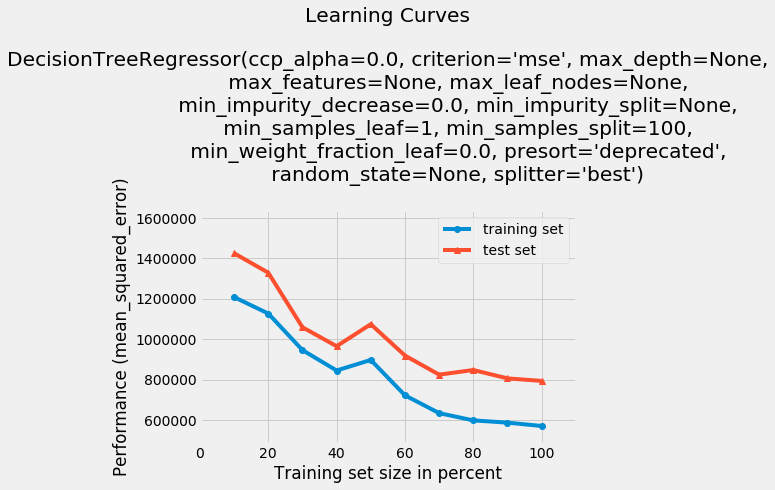

In [0]:
plot_learning_curves(temptrain, trainy, tempval, validationy, dt_reg_hp, scoring='mean_squared_error')

### Getting the feature importance after decision tree with hyper parameter

In [0]:
## Get important Features
feat_importances = pd.Series(dt_reg_hp.feature_importances_, index = tempval.columns)

In [0]:
## Sort importances  
feat_importances_ordered = feat_importances.nlargest(n=41)
feat_importances_ordered

farm_area                    0.228665
farming_company              0.206774
ingredient_type_ing_y        0.132398
dayofyear                    0.122562
farm_id                      0.100471
temp_obs                     0.069643
deidentified_location        0.044392
dew_temp                     0.038744
ingredient_type_ing_z        0.012459
day                          0.010339
pressure_sea_level           0.008680
hour                         0.005262
ingredient_type_ing_x        0.004711
wind_speed                   0.003074
weekend_or_not_validation    0.002406
wind_direction               0.002198
time_of_day_Night            0.002048
month                        0.001521
time_of_day_Morning          0.001234
precipitation                0.000566
day_name_Monday              0.000500
day_name_Wednesday           0.000332
day_name_Tuesday             0.000263
quarter                      0.000244
day_name_Sunday              0.000165
day_name_Saturday            0.000124
time_of_day_

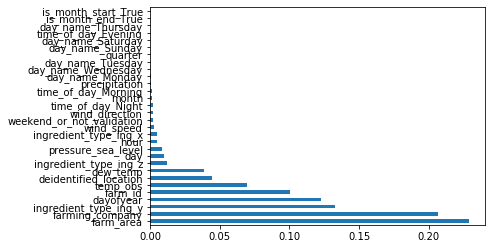

In [0]:
## Plot Importance
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline
feat_importances_ordered.plot(kind='barh')
plt.show()

In [0]:
temptrain.columns

Index(['farm_id', 'farm_area', 'farming_company', 'deidentified_location',
       'temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level',
       'wind_speed', 'dayofyear', 'day', 'hour', 'weekend_or_not_train',
       'ingredient_type_ing_x', 'ingredient_type_ing_y',
       'ingredient_type_ing_z'],
      dtype='object')

#### Dropping unncessary/unimportant features

In [0]:
temptrain.drop(['day_name_Monday', 'day_name_Wednesday', 'quarter', 'day_name_Tuesday', 'day_name_Sunday','precipitation',
       'day_name_Saturday', 'is_month_start_True','day_name_Thursday','time_of_day_Evening', 'is_month_end_True','time_of_day_Night','time_of_day_Morning','month'],axis =1,inplace =True)

In [0]:
tempval.drop(['day_name_Monday', 'day_name_Wednesday', 'quarter', 'day_name_Tuesday', 'day_name_Sunday','precipitation',
       'day_name_Saturday', 'is_month_start_True','day_name_Thursday','time_of_day_Evening', 'is_month_end_True','time_of_day_Night','time_of_day_Morning','month'],axis =1,inplace =True)

In [0]:
temptest2.drop(['day_name_Monday', 'day_name_Wednesday', 'quarter', 'day_name_Tuesday', 'day_name_Sunday','precipitation',
       'day_name_Saturday', 'is_month_start_True','day_name_Thursday','time_of_day_Evening', 'is_month_end_True','time_of_day_Night','time_of_day_Morning','month'],axis =1,inplace =True)

In [0]:
temptest2.columns

Index(['farm_id', 'farm_area', 'farming_company', 'deidentified_location',
       'temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level',
       'wind_speed', 'dayofyear', 'day', 'hour', 'weekend_or_not_test',
       'ingredient_type_ing_x', 'ingredient_type_ing_y',
       'ingredient_type_ing_z'],
      dtype='object')

In [0]:
temptest2.tail()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day,month,quarter,hour,weekend_or_not_test,is_month_end_True,is_month_start_True,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
20848795,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,7,0,0,0,0,0,0,1,0,0,0,1,0
20848796,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,8,0,0,0,0,0,0,1,0,0,0,1,0
20848797,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,9,0,0,0,0,0,0,1,0,0,0,1,0
20848798,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,10,0,0,0,0,0,0,1,0,0,0,1,0
20848799,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,11,0,0,0,0,0,0,1,0,0,0,1,0


## Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
%%time
#rf_grid = RandomForestRegressor(n_jobs=-1)
rf = RandomForestRegressor(min_samples_split = 100,n_jobs=-1)
rf.fit(X =temptrain ,y = trainy)

y_train_pred_rf = rf.predict(temptrain)
y_test_pred_rf = rf.predict(tempval)

CPU times: user 16h 39min 38s, sys: 29.5 s, total: 16h 40min 8s
Wall time: 29min 4s


In [0]:
temptest2.head()

,level_0,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day,month,quarter,hour,weekend_or_not_test,is_month_end_True,is_month_start_True,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,0,142,0,690.455078,8,12,17.796875,100.0,11.703125,1021.5,0.0,3.599609,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1
1,1,142,0,690.455078,8,12,17.796875,130.0,12.796875,1022.0,0.0,3.099609,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1
2,2,142,0,690.455078,8,12,16.093750,140.0,12.796875,1022.0,0.0,3.099609,1,1,1,1,2,1,0,1,0,0,1,0,0,0,0,0,1
3,3,142,0,690.455078,8,12,17.203125,140.0,13.296875,1022.0,0.0,3.099609,1,1,1,1,3,1,0,1,0,0,1,0,0,0,0,0,1
4,4,142,0,690.455078,8,12,16.703125,130.0,13.296875,1022.5,0.0,2.599609,1,1,1,1,4,1,0,1,0,0,1,0,0,0,0,0,1


In [0]:
temptest2.drop("level_0",axis=1,inplace = True)

In [0]:
y_test_main_pred_rf = rf.predict(temptest2)

In [0]:
import numpy as np

In [0]:
regression_error_metrics(trainy, y_train_pred_rf, validationy, y_test_pred_rf)

mean squared error for train:  595205.9337049824
mean squared error for validation:  663982.1872474479
root mean squared error for train:  771.4959064732504
root mean squared error validation:  814.8510215048195
mean absolute error for train:  65.0751218803014
mean absolute error for validation:  69.48994971372717
mean absolute percentage error for train:  nan
mean absolute percentage error for validation:  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


#### Checking the feature importance again

In [0]:
## Get important Features
feat_importances = pd.Series(rf.feature_importances_, index = tempval.columns)

In [0]:
## Sort importances  
feat_importances_ordered = feat_importances.nlargest(n=15)
feat_importances_ordered

farm_area                    0.257769
farming_company              0.210793
ingredient_type_ing_y        0.133491
dayofyear                    0.113383
farm_id                      0.077554
temp_obs                     0.072089
deidentified_location        0.045749
dew_temp                     0.035480
day                          0.017191
ingredient_type_ing_z        0.012851
hour                         0.008006
pressure_sea_level           0.006206
ingredient_type_ing_x        0.004693
wind_direction               0.002378
weekend_or_not_validation    0.001611
dtype: float64

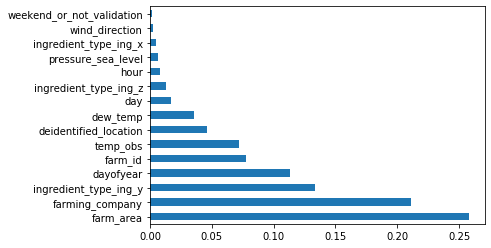

In [0]:
## Plot Importance
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline
feat_importances_ordered.plot(kind='barh')
plt.show()

In [0]:
y_test_main_pred_rf[:5]

array([0., 0., 0., 0., 0.])

In [0]:
output_sub_rf_hp_nodup_noout2 = pd.DataFrame({'id':ids_test,"yield":y_test_main_pred_rf})

In [0]:
output_sub_rf_hp_nodup_noout2.head(5)

,id,yield
0,0,0.0
1,129,0.0
2,258,0.0
3,387,0.0
4,516,0.0


In [0]:
output_sub_rf_hp_nodup_noout2.sample(5)

,id,yield
1078791,169241,0.000000
3687475,5810799,3.650236
7774917,15233015,1.555463
19297464,39286392,0.231358
18756836,37407828,749.187975


In [0]:
output_sub_rf_hp_nodup_noout2.sort_values(by = 'id',inplace=True)

In [0]:
output_sub_rf_hp_nodup_noout2.head()

,id,yield
0,0,0.000000
8760,1,0.603342
17520,2,0.019869
26280,3,0.000000
35040,4,2.015072


In [0]:
output_sub_rf_hp_nodup_noout2.describe()

,id,yield
count,2.084880e+07,2.084880e+07
mean,1.981995e+07,4.398032e+02
std,1.187348e+07,2.168144e+03
min,0.000000e+00,0.000000e+00
25%,9.411522e+06,2.243344e+01
50%,2.023914e+07,8.463445e+01
75%,2.898360e+07,2.761056e+02
max,4.169685e+07,2.067499e+05


In [0]:
output_sub_rf_hp_nodup_noout2.tail()

,id,yield
13210078,41696845,0.000000
13210079,41696846,259.280197
13236357,41696847,374.297307
13236358,41696848,0.000000
13236359,41696849,177.266875


In [0]:
output_sub_rf_hp_nodup_noout2.to_csv("/content/drive/My Drive/phd/8th_sub.csv", index = False)

In [0]:
output_sub_rf_hp_nodup_noout2.shape

(20848800, 2)

In [0]:
output_sub_rf_hp_nodup_noout = pd.read_csv("/content/drive/My Drive/phd/output_sub_rf_hp_nodup_noout.csv")

In [0]:
output_sub_rf_hp_nodup_noout.head()

,id,yield
0,0,0.000000
1,1,0.116191
2,2,0.021640
3,3,0.000000
4,4,1.713136


In [0]:
output_sub_rf_hp_nodup_noout.tail()

,id,yield
20848795,41696845,0.000000
20848796,41696846,259.121736
20848797,41696847,367.681814
20848798,41696848,0.000000
20848799,41696849,180.090284


In [0]:
output_sub_rf_hp_nodup_noout.iloc[999995:999999,:]

,id,yield
999995,999995,618.971123
999996,999996,2063.528426
999997,999997,544.022905
999998,999998,663.821425


In [0]:
submission_file2 = pd.read_csv("/content/drive/My Drive/phd/sample_submission2.csv")

In [0]:
submission_file2.head()

,id,yield
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
submission_file2.shape

(999999, 2)

In [0]:
submission_file2.tail()

,id,yield
999994,999995,0
999995,999996,0
999996,999997,0
999997,999998,0
999998,999999,0


In [0]:
submission_file2.drop("yield",axis = 1, inplace = True)

In [0]:
new_sub = pd.merge(submission_file2, output_sub_rf_hp_nodup_noout,how = 'left', left_on = "id",right_on = 'id')

In [0]:
new_sub.head()

,id,yield
0,1,0.116191
1,2,0.021640
2,3,0.000000
3,4,1.713136
4,5,0.027615


In [0]:
new_sub.tail()

,id,yield
999994,999995,618.971123
999995,999996,2063.528426
999996,999997,544.022905
999997,999998,663.821425
999998,999999,3453.146740


In [0]:
new_sub.shape

(999999, 2)

In [0]:
new_sub.to_csv("/content/drive/My Drive/phd/new_sub_format_rf.csv", index = False)

### Learning Curve for Random Forest

In [0]:
from mlxtend.plotting import plot_learning_curves

([1128325.6684547085,
  1082339.8251232265,
  842480.3481696062,
  801028.0854384048,
  767838.2716218097,
  719909.642484961,
  667117.402731279,
  651500.1650097582,
  612519.0355210943,
  577396.0368236805],
 [1287523.814609593,
  1115286.8434842583,
  955815.5080594165,
  871602.7593266137,
  834002.0727349177,
  768596.3923560937,
  735688.9348525885,
  711453.6201601297,
  696798.05950101,
  657502.2025788144])

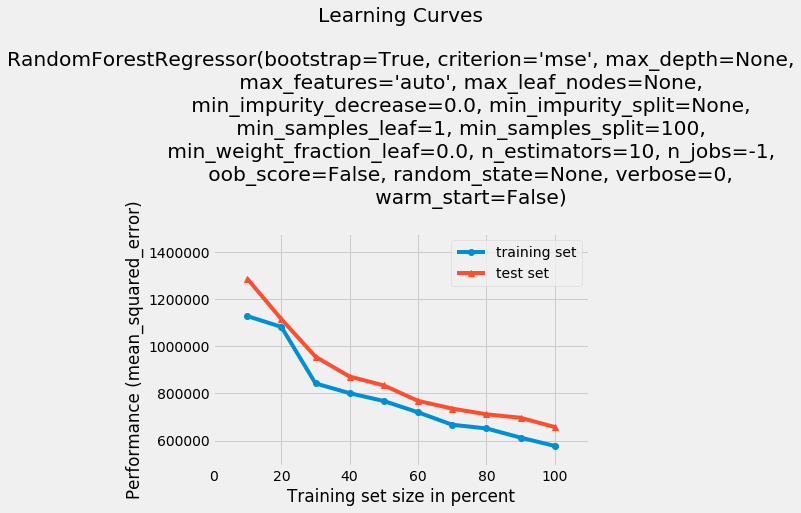

In [0]:
plot_learning_curves(temptrain, trainy, tempval, validationy, rf, scoring='mean_squared_error')

## 3. Sourcing Strategy for ing_w per month

In [0]:
temptest2.tail()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day,month,quarter,hour,weekend_or_not_test,is_month_end_True,is_month_start_True,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
20848795,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,7,0,0,0,0,0,0,1,0,0,0,1,0
20848796,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,8,0,0,0,0,0,0,1,0,0,0,1,0
20848797,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,9,0,0,0,0,0,0,1,0,0,0,1,0
20848798,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,10,0,0,0,0,0,0,1,0,0,0,1,0
20848799,596,0,8572.25293,14,3,-14.328125,308.0,-18.15625,1025.0,-1.0,6.230469,362,28,12,4,11,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
y_test_main_pred_rf[-5:]

array([3.13688779, 3.13688779, 3.13688779, 3.13688779, 3.13688779])

In [0]:
testwithtarget = pd.concat([temptest2, pd.DataFrame(y_test_main_pred_rf,columns=['predyield'])],axis =1 )

In [0]:
testwithtarget.shape

(20848800, 29)

In [0]:
testwithtarget.columns

Index(['farm_id', 'ingredient_type', 'farm_area', 'farming_company',
       'deidentified_location', 'temp_obs', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed', 'dayofyear', 'day',
       'month', 'quarter', 'hour', 'weekend_or_not_test', 'is_month_end_True',
       'is_month_start_True', 'day_name_Monday', 'day_name_Saturday',
       'day_name_Sunday', 'day_name_Thursday', 'day_name_Tuesday',
       'day_name_Wednesday', 'time_of_day_Evening', 'time_of_day_Morning',
       'time_of_day_Night', 'predyield'],
      dtype='object')

In [0]:
testwithtarget.head()

,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,dayofyear,day,month,quarter,hour,weekend_or_not_test,is_month_end_True,is_month_start_True,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,predyield
0,142,0,690.455078,8,12,17.796875,100.0,11.703125,1021.5,0.0,3.599609,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0.000267
1,142,0,690.455078,8,12,17.796875,130.0,12.796875,1022.0,0.0,3.099609,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0.000267
2,142,0,690.455078,8,12,16.093750,140.0,12.796875,1022.0,0.0,3.099609,1,1,1,1,2,1,0,1,0,0,1,0,0,0,0,0,1,0.000618
3,142,0,690.455078,8,12,17.203125,140.0,13.296875,1022.0,0.0,3.099609,1,1,1,1,3,1,0,1,0,0,1,0,0,0,0,0,1,0.000267
4,142,0,690.455078,8,12,16.703125,130.0,13.296875,1022.5,0.0,2.599609,1,1,1,1,4,1,0,1,0,0,1,0,0,0,0,0,1,0.000267


In [0]:
final_train_merged['month'] = final_train_merged['date'].dt.month

In [0]:
final_train_merged[final_train_merged['ingredient_type']=='ing_w'].groupby(['month'])['yield'].sum()

month
1     152382096.0
2     140397792.0
3     141609840.0
4     147248448.0
5     161806080.0
6     182349376.0
7     192081840.0
8     196522640.0
9     192687408.0
10    178265264.0
11    177691264.0
12    176790592.0
Name: yield, dtype: float32

In [0]:
testwithtarget[testwithtarget['ingredient_type']==0].groupby(['month'])['predyield'].sum()

month
1     1.556060e+08
2     1.439793e+08
3     1.566855e+08
4     1.489419e+08
5     1.649335e+08
6     1.848261e+08
7     1.971570e+08
8     1.988665e+08
9     1.949590e+08
10    1.917609e+08
11    1.835122e+08
12    1.822560e+08
Name: predyield, dtype: float64

In [0]:
twt = testwithtarget[testwithtarget['ingredient_type']==0].groupby(['month'])['predyield'].sum()

In [0]:
twt.shape

(12,)

In [0]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline

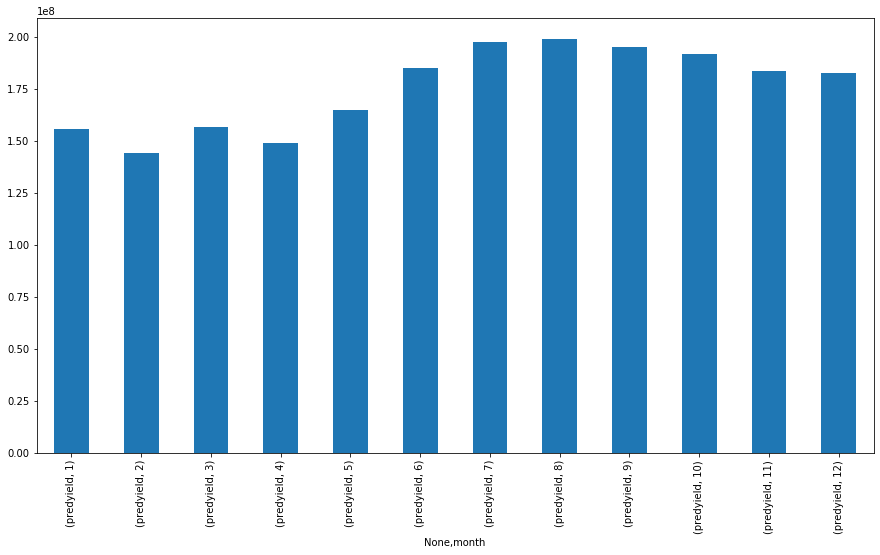

In [0]:
pd.DataFrame(testwithtarget[testwithtarget['ingredient_type']==0].groupby(['month'])['predyield'].sum()).unstack().plot(kind = 'bar',figsize=(15,8))

#### Original demand given :

In [0]:
# 1 90430481
# 2 75344853
# 3 91917783
# 4 82591524
# 5 87419669
# 6 297500000
# 7 198900000
# 8 97367031
# 9 91049286
# 10 91755300
# 11 86533266
# 12 88514610

In [0]:
org_demand = [90430481, 75344853, 91917783, 82591524,87419669, 297500000, 198900000, 97367031, 91049286, 91755300, 86533266, 88514610]

In [0]:
ddf = twt - org_demand

In [0]:
ddf

month
1     6.517553e+07
2     6.863441e+07
3     6.476773e+07
4     6.635039e+07
5     7.751380e+07
6    -1.126739e+08
7    -1.743017e+06
8     1.014994e+08
9     1.039098e+08
10    1.000056e+08
11    9.697893e+07
12    9.374134e+07
Name: predyield, dtype: float64

In [0]:
twtlist = [1.556060e+08,
     1.439793e+08,
     1.566855e+08,
     1.489419e+08,
     1.649335e+08,
     1.848261e+08,
     1.971570e+08,
     1.988665e+08,
     1.949590e+08,
    1.917609e+08,
    1.835122e+08,
    1.822560e+08]
org_demandlist = [90430481, 
              75344853, 
              91917783,
              82591524,
              87419669,
              297500000, 
              198900000, 
              97367031, 
              91049286, 
              91755300, 
              86533266,
              88514610]

In [0]:
extra  =  twtlist[0] - org_demandlist[1]
print("Extra produce after meeting 2nd month's demand : ",extra)
extra2 = extra + twtlist[1] 
extra = extra2 -  org_demandlist[2]
print("Extra produce after meeting 3rd month's demand : ",extra)
extra2 = extra + twtlist[2] 
extra = extra2 -  org_demandlist[3]
print("Extra produce after meeting 4th month's demand : ",extra)
extra2 = extra + twtlist[3] 
extra = extra2 -  org_demandlist[4]
print("Extra produce after meeting 5th month's demand : ",extra)
extra2 = extra + twtlist[4] 
extra = extra2 -  org_demandlist[5]
print("Extra produce after meeting 6th month's demand : ",extra)
extra2 = extra + twtlist[5] 
extra = extra2 -  org_demandlist[6]
print("Extra produce after meeting 7th month's demand : ",extra)
extra2 = extra + twtlist[6] 
extra = extra2 -  org_demandlist[7]
print("Extra produce after meeting 8th month's demand : ",extra)
extra2 = extra + twtlist[7] 
extra = extra2 -  org_demandlist[8]
print("Extra produce after meeting 9th month's demand : ",extra)
extra2 = extra + twtlist[8] 
extra = extra2 -  org_demandlist[9]
print("Extra produce after meeting 10th month's demand : ",extra)
extra2 = extra + twtlist[9] 
extra = extra2 -  org_demandlist[10]
print("Extra produce after meeting 11th month's demand : ",extra)
extra2 = extra + twtlist[10] 
extra = extra2 -  org_demandlist[11]
print("Extra produce after meeting 12th month's demand : ",extra)
extra2 = extra + twtlist[11] 
print("Extra produce remaing after year end : ",extra2)

Extra produce after meeting 2nd month's demand :  80261147.0
Extra produce after meeting 3rd month's demand :  132322664.0
Extra produce after meeting 4th month's demand :  206416640.0
Extra produce after meeting 5th month's demand :  267938871.0
Extra produce after meeting 6th month's demand :  135372371.0
Extra produce after meeting 7th month's demand :  121298471.0
Extra produce after meeting 8th month's demand :  221088440.0
Extra produce after meeting 9th month's demand :  328905654.0
Extra produce after meeting 10th month's demand :  432109354.0
Extra produce after meeting 11th month's demand :  537336988.0
Extra produce after meeting 12th month's demand :  632334578.0
Extra produce remaing after year end :  814590578.0


In [0]:
extra2

814590578.0

<h4><font color='#C44B4B'> <u></u></font><center><br><br>
<font color='#15657F'>SOURCING STRATEGY FOR ING_W
</font></center></h4>
<br>
<img src="images.jpg" width = '400'>
<br>
CONDITIONS :
<br>
1. You should source the ingredient at least a month before<br>
2. The ingredient has a long shelf life, capable of being used for at least 8
months once stocked
<br>

<br>
Assuming that the demand for first month .i.e Jan 2017 was met by the yield production of the previous month .i.e last year(Dec 2016).
Now, for the consequent months starting from Feb 2017, the ing_w should be sourced atleast one month before .i.e in Jan 2017 yield production should be sourced such that it should be able to meet Feb 2017 demand. The remaining left over yield could be stored and can be later used to meet future month's demand.
This has the shelf live of upto eight(8) months. Now, for the next month .i.e for March 2017 demand, there would be the left yield of the Jan month plus the new yield production of the Feb 2017 also. Similary after doing the calculations we see that there is plenty of yield production happening in the year 2017 such that for all the months demands are met. 
Moreover there is a surplus of 814590578.0 amount which can probably be used to meet the demands for few months in the next year (2018) provided the demand remains near or less the same.

## Random Forest grid search

#### *Took more than 2 hours still was not able to run completely, so had to interrupt*

In [0]:
%%time
rf_grid = RandomForestRegressor(n_jobs=-1)
param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 15, 20, 25, 30, 40],
           "min_samples_leaf" : [45,60,85,100,120,150]}
 
rf_cv_grid = GridSearchCV(estimator = rf_grid, param_grid = param_grid, cv = 5)
rf_cv_grid.fit(temptrain, trainy)
rf_cv_grid.best_estimator_

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

In [0]:
y_train_pred_rf_grid_best = rf_cv_grid.best_estimator_.predict(X_train_aligned)
y_test_pred_rf_grid_best = rf_cv_grid.best_estimator_.predict(X_validation_aligned)

In [0]:
regression_error_metrics(trainy, y_train_pred_rf_grid_best ,validationy,y_test_pred_rf_grid_best)

## XGBoost 

In [0]:
from xgboost import XGBRegressor

In [0]:
xgb = XGBRegressor(n_jobs=-1) 

In [0]:
temptrain.dtypes

farm_id                     int64
farm_area                 float64
farming_company             int64
deidentified_location       int64
temp_obs                  float16
wind_direction            float16
dew_temp                  float16
pressure_sea_level        float16
wind_speed                float16
dayofyear                category
day                      category
hour                     category
weekend_or_not_train        int64
ingredient_type_ing_x       uint8
ingredient_type_ing_y       uint8
ingredient_type_ing_z       uint8
dtype: object

In [0]:
#label encoding the categorical columns
from sklearn import preprocessing 
  
label_encoder6 = preprocessing.LabelEncoder() 
label_encoder7 = preprocessing.LabelEncoder() 

label_encoder10 = preprocessing.LabelEncoder() 

In [0]:
# Encode labels in column target. 

label_encoder6.fit(temptrain["dayofyear"])
label_encoder7.fit(tempval["day"])
label_encoder10.fit(temptest2["hour"])

LabelEncoder()

In [0]:
temptrain['dayofyear'] = label_encoder6.transform(temptrain["dayofyear"]) 
temptrain['day'] = label_encoder7.transform(temptrain["day"]) 
temptrain['hour'] = label_encoder10.transform(temptrain["hour"]) 


In [0]:
tempval['dayofyear'] = label_encoder6.transform(tempval["dayofyear"]) 
tempval['day'] = label_encoder7.transform(tempval["day"]) 
tempval['hour'] = label_encoder10.transform(tempval["hour"]) 


In [0]:
temptest2['dayofyear'] = label_encoder6.transform(temptest2["dayofyear"]) 
temptest2['day'] = label_encoder7.transform(temptest2["day"]) 
temptest2['hour'] = label_encoder10.transform(temptest2["hour"]) 


In [0]:
%%time
xgb.fit(X=temptrain, y=trainy)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[12:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:55] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
CPU times: user 2h 31min 30s, sys: 11.5 s, total: 2h 31min 42s
Wall time: 11min 39s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
temptest2.columns

Index(['farm_id', 'farm_area', 'farming_company', 'deidentified_location',
       'temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level',
       'wind_speed', 'dayofyear', 'day', 'hour', 'weekend_or_not',
       'ingredient_type_ing_x', 'ingredient_type_ing_y',
       'ingredient_type_ing_z'],
      dtype='object')

In [0]:
tempval.columns

Index(['farm_id', 'farm_area', 'farming_company', 'deidentified_location',
       'temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level',
       'wind_speed', 'dayofyear', 'day', 'hour', 'weekend_or_not',
       'ingredient_type_ing_x', 'ingredient_type_ing_y',
       'ingredient_type_ing_z'],
      dtype='object')

In [0]:
temptrain.columns

Index(['farm_id', 'farm_area', 'farming_company', 'deidentified_location',
       'temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level',
       'wind_speed', 'dayofyear', 'day', 'hour', 'weekend_or_not',
       'ingredient_type_ing_x', 'ingredient_type_ing_y',
       'ingredient_type_ing_z'],
      dtype='object')

In [0]:
temptrain.rename({'weekend_or_not_train': 'weekend_or_not'}, axis=1, inplace = True)

In [0]:
tempval.rename({'weekend_or_not_validation': 'weekend_or_not'}, axis=1, inplace = True)

In [0]:
temptest2.rename({'weekend_or_not_test': 'weekend_or_not'}, axis=1, inplace = True)

In [0]:
#Obtain the predictions

y_train_pred_xgb = xgb.predict(temptrain)
y_test_pred_xgb = xgb.predict(tempval)

In [0]:
y_test_main_pred_xgb = xgb.predict(temptest2)

In [0]:
regression_error_metrics(trainy, y_train_pred_xgb ,validationy,y_test_pred_xgb)

mean squared error for train:  2876173.2
mean squared error for validation:  2918752.0
root mean squared error for train:  1695.9285
root mean squared error validation:  1708.4355
mean absolute error for train:  379.92126
mean absolute error for validation:  380.48132
mean absolute percentage error for train:  inf
mean absolute percentage error for validation:  inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
y_test_main_pred_xgb[:5]

array([201.46019, 201.46019, 201.46019, 201.46019, 201.46019],
      dtype=float32)

In [0]:
output_sub_rf_hp_nodup_noout2 = pd.DataFrame({'id':ids_test,"yield":y_test_main_pred_xgb})

In [0]:
output_sub_rf_hp_nodup_noout2.head(5)

,id,yield
0,0,201.46019
1,129,201.46019
2,258,201.46019
3,387,201.46019
4,516,201.46019


In [0]:
output_sub_rf_hp_nodup_noout2.sample(5)

,id,yield
18263323,33231360,373.595154
1435655,2749938,43.210747
10229391,21216880,52.015724
2936392,3521836,514.139099
16356469,32302340,289.379272


In [0]:
output_sub_rf_hp_nodup_noout2.sort_values(by = 'id',inplace=True)

In [0]:
output_sub_rf_hp_nodup_noout2.head()

,id,yield
0,0,201.460190
8760,1,181.589539
17520,2,199.113754
26280,3,201.460190
35040,4,394.970184


In [0]:
output_sub_rf_hp_nodup_noout2.describe()

,id,yield
count,2.084880e+07,2.084880e+07
mean,1.981995e+07,4.316648e+02
std,1.187348e+07,1.367007e+03
min,0.000000e+00,-8.839988e+02
25%,9.411522e+06,2.249800e+01
50%,2.023914e+07,1.598078e+02
75%,2.898360e+07,4.551442e+02
max,4.169685e+07,4.916011e+04


In [0]:
output_sub_rf_hp_nodup_noout2.tail()

,id,yield
13210078,41696845,190.204773
13210079,41696846,608.724609
13236357,41696847,229.039658
13236358,41696848,353.003357
13236359,41696849,711.470764


In [0]:
output_sub_rf_hp_nodup_noout2.to_csv("/content/drive/My Drive/phd/8th_sub.csv", index = False)

In [0]:
output_sub_rf_hp_nodup_noout2.shape

(20848800, 2)

In [0]:
output_sub_rf_hp_nodup_noout.to_csv("/content/drive/My Drive/phd/output_sub_rf_hp_nodup_noout.csv", index = False)

## Decision Tree without Removing Outliers

In [0]:
dt_reg_split =tree.DecisionTreeRegressor(min_samples_split = 100)
dt_reg_split.fit(temptrain,trainy)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred_train_reg_split = dt_reg_split.predict(temptrain)
pred_test_reg_split = dt_reg_split.predict(tempval)

In [0]:
regression_error_metrics(trainy, pred_train_reg_split, validationy, pred_test_reg_split)

mean squared error for train:  1614937422.0518959
mean squared error for validation:  1704173431.9076195
root mean squared error for train:  40186.28400402177
root mean squared error validation:  41281.63552849644
mean absolute error for train:  445.9085795972426
mean absolute error for validation:  457.74852449291143
mean absolute percentage error for train:  nan
mean absolute percentage error for validation:  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


## Neural Network

In [0]:
import keras
from keras import regularizers, optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


Using TensorFlow backend.


In [0]:

## Defining my optimizer - Its just a refined form of SGD
## ref - https://keras.io/optimizers/
adam = keras.optimizers.Adam(lr=0.01, decay=0.0005)

## Just a way to define neural nets. There are two ways sequential and functional
## Sequential model lets you add neural net layers one after another by calling function
model = Sequential()


In [0]:
tempval.shape

(5019105, 28)

In [0]:

## Adding one layer having only one neuron
## Notice our data has 28 input columns which goes into as the "input_shape" parameter
## Notice the use of l2 regularizer
model.add(Dense(10, input_dim=28))
model.add(Dense(12, activation= "relu"))
model.add(Dense(1, activation='linear', kernel_regularizer=regularizers.l2()))

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])



In [0]:
## Training neural nets
history = model.fit(temptrain, trainy, validation_data=(tempval,validationy), epochs=50, batch_size=100000, callbacks=[reduce_lr, earlystopper])




Train on 15057314 samples, validate on 5019105 samples
Epoch 1/50





15057314/15057314 [==============================] - 207s 14us/step - loss: 5389469.6771 - mean_squared_error: 5389469.6771 - val_loss: 5470544.8547 - val_mean_squared_error: 5470544.8547
Epoch 2/50
15057314/15057314 [==============================] - 208s 14us/step - loss: 5345109.9853 - mean_squared_error: 5345109.9853 - val_loss: 5441981.5291 - val_mean_squared_error: 5441981.5291
Epoch 3/50
15057314/15057314 [==============================] - 208s 14us/step - loss: 5315414.1088 - mean_squared_error: 5315414.1088 - val_loss: 5414149.3367 - val_mean_squared_error: 5414149.3367
Epoch 4/50
15057314/15057314 [==============================] - 208s 14us/step - loss: 5280971.6838 - mean_squared_error: 5280971.6838 - val_loss: 5371246.3591 - val_mean_squared_error: 5371246.3591
Epoch 5/50
15057314/15057314 [==============================] - 208s 14us/step - loss: 5245905.5643 - mean_squared_error: 5245905.5643 - val_

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                290       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


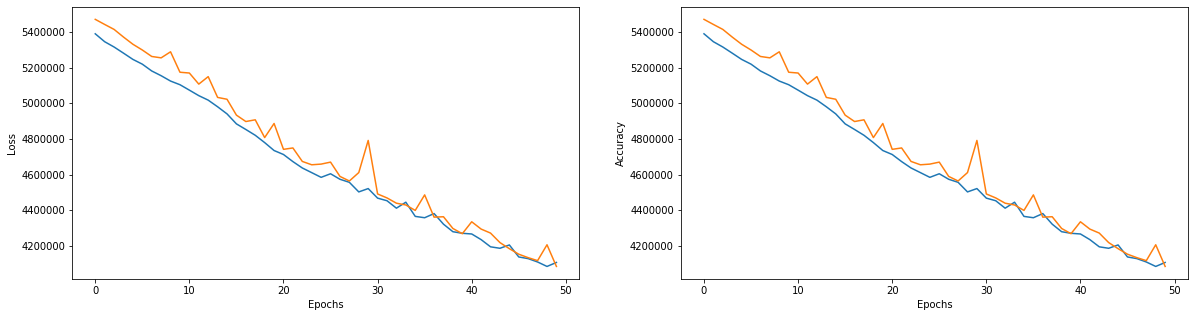

In [0]:
train_acc = history.history['mean_squared_error']
train_loss = history.history['loss']

val_acc = history.history['val_mean_squared_error']
val_loss = history.history['val_loss']

from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)

## The error outputs of all the models 

In [0]:
pip install tabletext

  Created wheel for tabletext: filename=tabletext-0.1-cp36-none-any.whl size=6024 sha256=b6576ad3ab273455d0ff9094eb2d86f69f8c6d3ab6c221abc02127130b24ea2f
  Stored in directory: /root/.cache/pip/wheels/63/15/d8/897b137f43975c4f5f49139be65fee6dbeab6a3f88c1838f66
Successfully built tabletext


In [0]:
import tabletext

data = [["","Linear Regression","Decision Tree with Outliers","Decision Tree without Outliers"],
        ["Train",2277.80,40186.28,9.49],
        ["Validation",2302.14,41281.63,887.70],
        ["Test","NA","NA","NA"]
        ]

print (tabletext.to_text(data))

┌────────────┬───────────────────┬─────────────────────────────┬────────────────────────────────┐
│            │ Linear Regression │ Decision Tree with Outliers │ Decision Tree without Outliers │
├────────────┼───────────────────┼─────────────────────────────┼────────────────────────────────┤
│ Train      │            2277.8 │                    40186.28 │                           9.49 │
├────────────┼───────────────────┼─────────────────────────────┼────────────────────────────────┤
│ Validation │           2302.14 │                    41281.63 │                          887.7 │
├────────────┼───────────────────┼─────────────────────────────┼────────────────────────────────┤
│ Test       │ NA                │ NA                          │ NA                             │
└────────────┴───────────────────┴─────────────────────────────┴────────────────────────────────┘


In [0]:
data = [["Decision Tree with Hyperparameter","Random Forest with Hyperparameter","XG Boost","Neural Network"],
        [755.37,771.49,1695.92,4106701.77],
        [890.90,814.85,1708.43,4084398.54],
        ["3140.43","3061.41 & 4002.72(new-sub-format)","NA","NA"]
        ]

print (tabletext.to_text(data))

┌───────────────────────────────────┬───────────────────────────────────┬──────────┬────────────────┐
│ Decision Tree with Hyperparameter │ Random Forest with Hyperparameter │ XG Boost │ Neural Network │
├───────────────────────────────────┼───────────────────────────────────┼──────────┼────────────────┤
│                            755.37 │                            771.49 │  1695.92 │     4106701.77 │
├───────────────────────────────────┼───────────────────────────────────┼──────────┼────────────────┤
│                             890.9 │                            814.85 │  1708.43 │     4084398.54 │
├───────────────────────────────────┼───────────────────────────────────┼──────────┼────────────────┤
│ 3140.43                           │ 3061.41 & 4002.72(new-sub-format) │ NA       │ NA             │
└───────────────────────────────────┴───────────────────────────────────┴──────────┴────────────────┘
